### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.


The company is looking at prospective properties to buy to enter the market. Need to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

--Which variables are significant in predicting the price of a house, and

--How well those variables describe the price of a house.


In [58]:
## importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [59]:
# reading the dataset
HouseData = pd.read_csv("train.csv")

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, treat null values,duplicates etc

In [147]:
HouseData.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [61]:
HouseData.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [62]:
HouseData.shape

(1460, 81)

In [63]:
# summary of the dataset: 1460 rows, 81 columns
print(HouseData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [64]:
## remove duplicates and keep first occurrences
HouseData=HouseData.drop_duplicates(keep='first', inplace=False)
print(HouseData.shape)

##Note: data has no duplicates

(1460, 81)


In [65]:
#Check the number of NAN values in the columns
HouseData.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [66]:
HouseData.isna().sum()/HouseData.shape[0]

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [67]:
## removing columns which have more than 30% NAN values
limit=len(HouseData)*0.7

In [68]:
df_clean=HouseData.dropna(thresh=limit,axis=1)

In [69]:
df_clean.shape
# Now 76 columns are remaining

(1460, 76)

In [70]:
print(df_clean.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64


treating the null values 

In [71]:
# get the columns with null values and their respective datatypes and null count
null_cols = []
for i in df_clean.columns:
    if df_clean[i].isnull().sum() > 0:
        print(i,df_clean[i].dtypes,df_clean[i].isnull().sum())        

LotFrontage float64 259
MasVnrType object 8
MasVnrArea float64 8
BsmtQual object 37
BsmtCond object 37
BsmtExposure object 38
BsmtFinType1 object 37
BsmtFinType2 object 38
Electrical object 1
GarageType object 81
GarageYrBlt float64 81
GarageFinish object 81
GarageQual object 81
GarageCond object 81


In [72]:
# treat null values for float values by replacing them with mean
null_cols2 = []
for i in df_clean.columns:
    if df_clean[i].dtypes == 'float64':
        if df_clean[i].isnull().sum() > 0:
            df_clean[i] = df_clean[i].replace(np.NaN, df_clean[i].mean())

In [73]:
# again get the features with null values
null_cols = []
for i in df_clean.columns:
    if df_clean[i].isnull().sum() > 0:
        print(i,df_clean[i].dtypes,df_clean[i].isnull().sum())    

MasVnrType object 8
BsmtQual object 37
BsmtCond object 37
BsmtExposure object 38
BsmtFinType1 object 37
BsmtFinType2 object 38
Electrical object 1
GarageType object 81
GarageFinish object 81
GarageQual object 81
GarageCond object 81


In [74]:
# getting columns with null values again after treating float columns
null_cols = [i for i in df_clean if df_clean[i].isnull().sum() > 0]
print([i for i in df_clean if df_clean[i].isnull().sum() > 0])

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [75]:
for i in null_cols:
    print(df_clean[i].unique())
    

['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [76]:
#  replacing the null values with mode
for i in null_cols:

    mode_val = df_clean[i].mode() 
    print(mode_val[0])
    df_clean[i] = df_clean[i].replace(np.NaN, mode_val[0])

None
TA
TA
No
Unf
Unf
SBrkr
Attchd
Unf
TA
TA


In [77]:
print(df_clean[i].isnull().sum().sum())

0


In [78]:
# dropping ID and other unnecessary columns
df_clean = df_clean.drop(['Id','YearBuilt', 'YearRemodAdd'], axis=1) 
df_clean.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold SaleType SaleCondition SalePrice  
0        0       0       2    2008       WD        Normal    208500  
1        0       0       5    2007       WD        Normal    181500  
2        0       0       9    2008       WD        Normal    223500  
3        0       0       2    2006       WD       Abnorml    140000  
4        0       0      12    2008       WD        Normal    250000  

[5 rows x 73 columns]

### 2: Visualising the Data


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


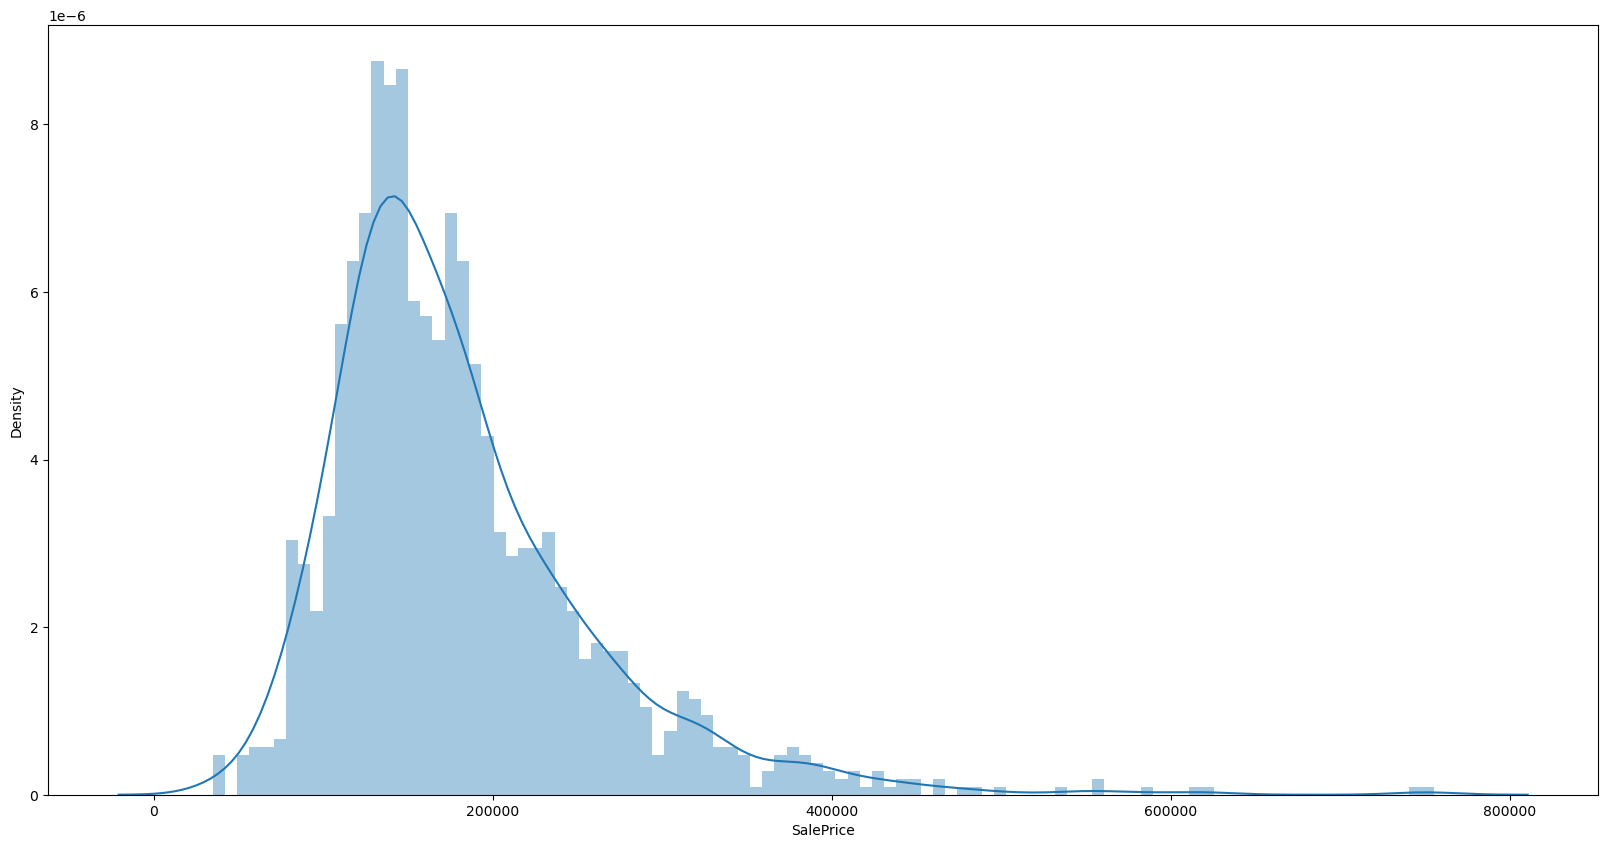

In [79]:
# Let's take a look at how house prices are distributed
print(df_clean['SalePrice'].describe())
plt.figure(figsize=(20, 10))
sns.distplot(df_clean['SalePrice'], bins=100);

In [80]:
# prices are skewed to the right and some extreme values are above ~500,000
df_clean[df_clean['SalePrice']>500000]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
178           20       RL         63.0    17423   Pave      IR1         Lvl   
440           20       RL        105.0    15431   Pave      Reg         Lvl   
691           60       RL        104.0    21535   Pave      IR1         Lvl   
769           60       RL         47.0    53504   Pave      IR2         HLS   
803           60       RL        107.0    13891   Pave      Reg         Lvl   
898           20       RL        100.0    12919   Pave      IR1         Lvl   
1046          60       RL         85.0    16056   Pave      IR1         Lvl   
1169          60       RL        118.0    35760   Pave      IR1         Lvl   
1182          60       RL        160.0    15623   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
178     AllPub   CulDSac       Gtl  ...             0         0           0   
440     AllPub    Inside       Gtl  ...             0         0         170   
691     AllPub    Corner       Gtl  ...             0         0           0   
769     AllPub   CulDSac       Mod  ...             0         0         210   
803     AllPub    Inside       Gtl  ...             0         0         192   
898     AllPub    Inside       Gtl  ...             0         0           0   
1046    AllPub    Inside       Gtl  ...             0         0           0   
1169    AllPub   CulDSac       Gtl  ...             0         0           0   
1182    AllPub    Corner       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold SaleType SaleCondition SalePrice  
178         0       0       7    2009      New       Partial    501837  
440         0       0       4    2009       WD        Normal    555000  
691         0       0       1    2007       WD        Normal    755000  
769         0       0       6    2010       WD        Normal    538000  
803         0       0       1    2009      New       Partial    582933  
898         0       0       3    2010      New       Partial    611657  
1046        0       0       7    2006      New       Partial    556581  
1169        0       0       7    2006       WD        Normal    625000  
1182      555       0       7    2007       WD       Abnorml    745000  

[9 rows x 73 columns]

#### Visualising Numeric Variables

In [81]:
df_num = df_clean.select_dtypes(include=['int','float'])

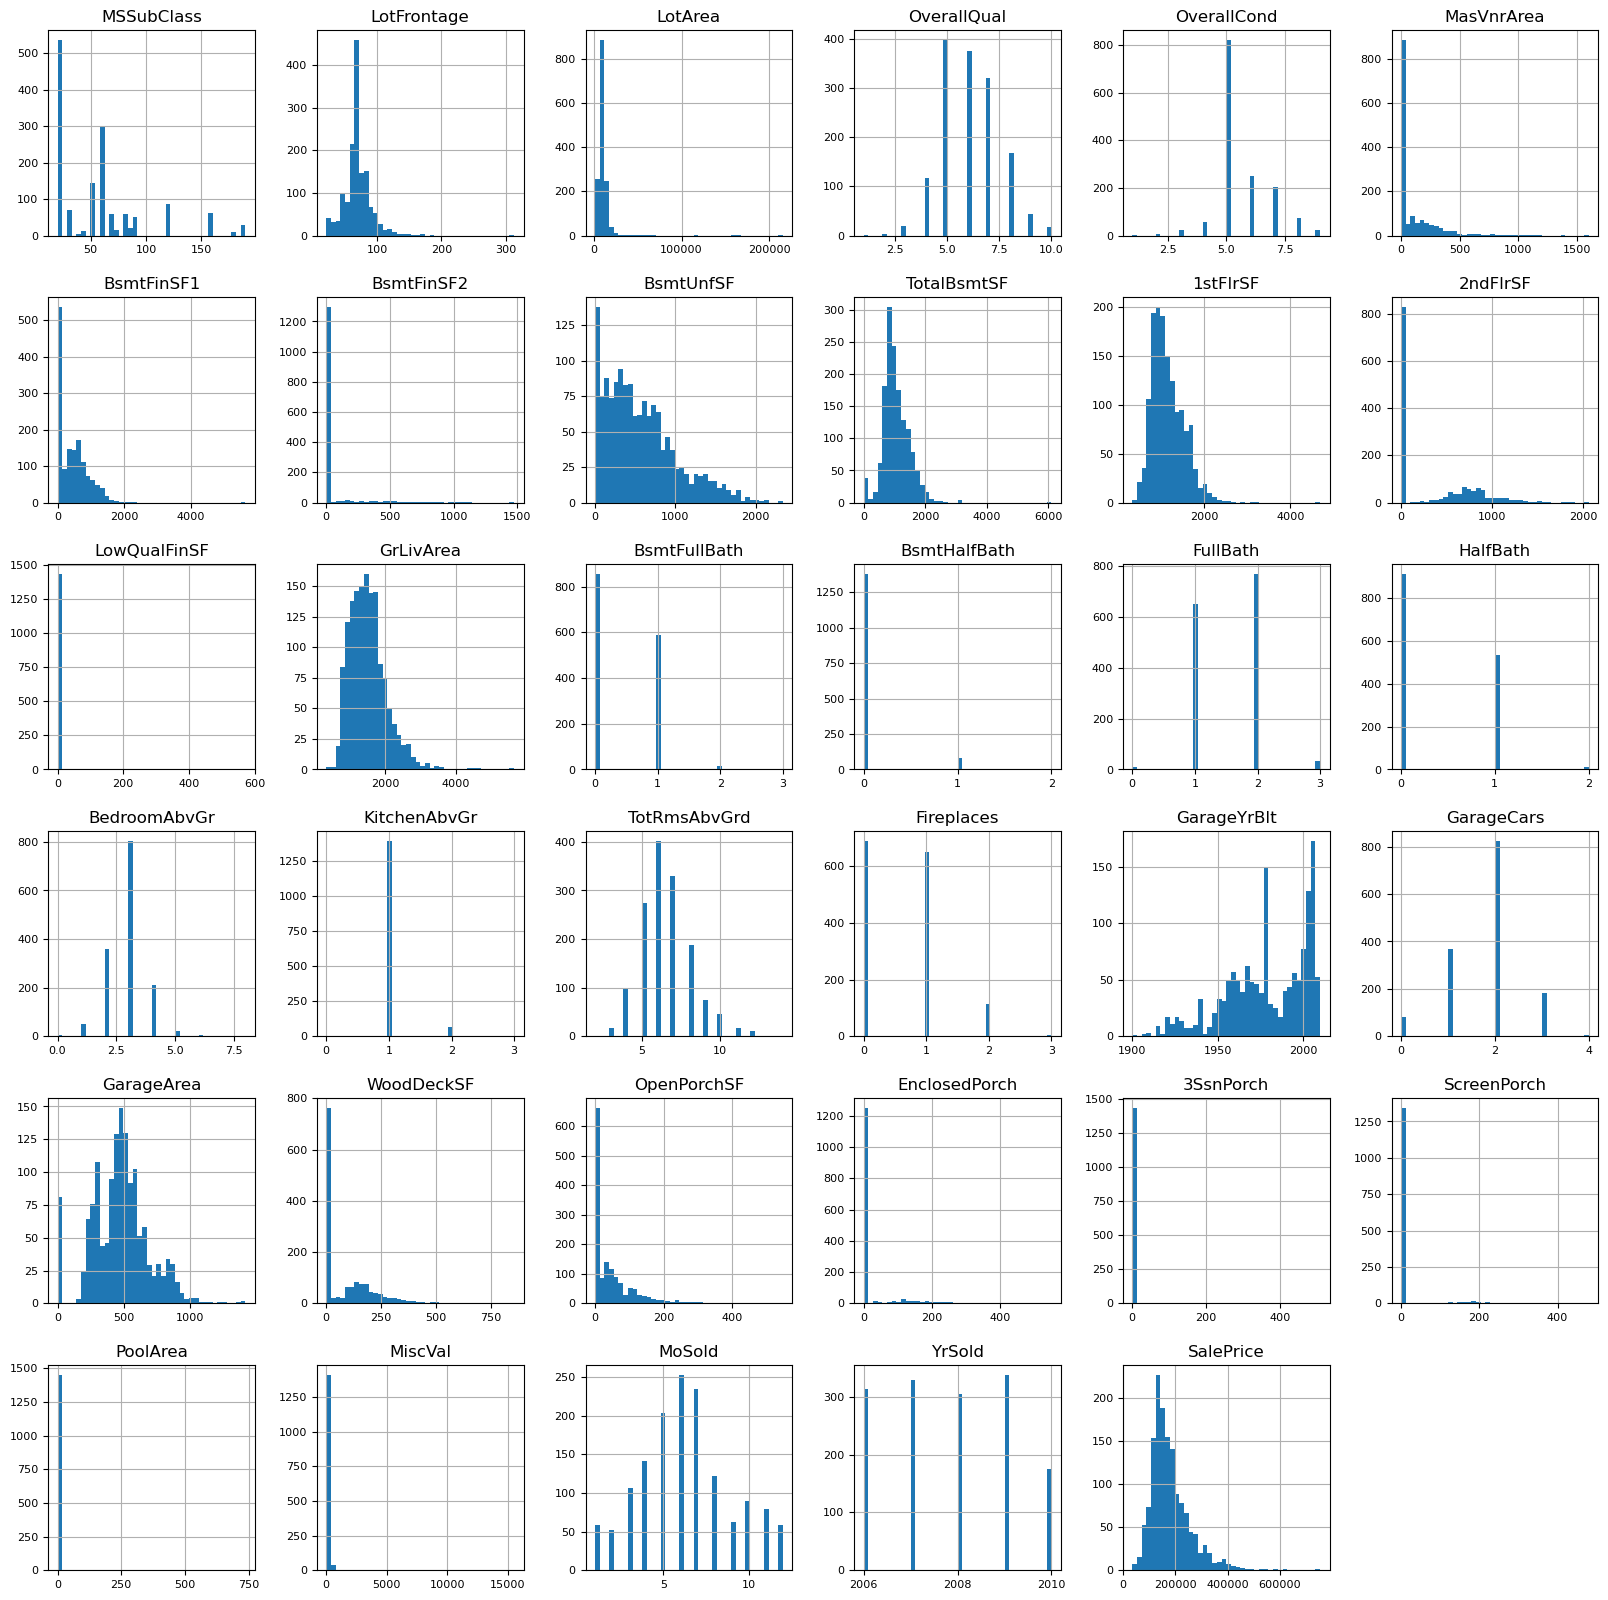

In [82]:
# Creating histogram of all numeric columns
df_clean.hist(figsize=(20, 20), bins=40, xlabelsize=8, ylabelsize=8); 


Note: from histogram above, we can see that Features like 1stFlrSF, TotalBsmtSF etc. seem to share a distribution similar to SalePrice.
Also, columns like 'FullBath', 'HalfBath' etc. are categorical columns having numeric values. Need to change the datatypes of  these categorical columns

In [83]:
# categorical columns having numeric datatypes
cat_num = df_clean[[
'OverallCond',
'OverallQual',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath', 
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr', 
'TotRmsAbvGrd', 
'Fireplaces',
'GarageCars',
'MoSold', 
 'YrSold']]


for i in cat_num:
    print(df_clean[i])
    print(df_clean[i].unique())
    

0       5
1       8
2       5
3       5
4       5
       ..
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: int64
[5 8 6 7 4 2 3 9 1]
0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64
[ 7  6  8  5  9  4 10  3  1  2]
0       1
1       0
2       1
3       1
4       1
       ..
1455    0
1456    1
1457    0
1458    1
1459    1
Name: BsmtFullBath, Length: 1460, dtype: int64
[1 0 2 3]
0       0
1       1
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: BsmtHalfBath, Length: 1460, dtype: int64
[0 1 2]
0       2
1       2
2       2
3       1
4       2
       ..
1455    2
1456    2
1457    2
1458    1
1459    1
Name: FullBath, Length: 1460, dtype: int64
[2 1 3 0]
0       1
1       0
2       1
3       0
4       1
       ..
1455    1
1456    0
1457    0
1458    0
1459    1
Name: HalfBath, Length: 1460, d

In [84]:
## changing the datatypes of categorical columns mentioned above

df_clean['OverallCond']=df_clean['OverallCond'].astype('object')
df_clean['OverallQual']=df_clean['OverallQual'].astype('object')
df_clean['BsmtFullBath']=df_clean['BsmtFullBath'].astype('object')
df_clean['BsmtHalfBath']=df_clean['BsmtHalfBath'].astype('object')
df_clean['FullBath']=df_clean['FullBath'].astype('object')
df_clean['HalfBath']=df_clean['HalfBath'].astype('object')
df_clean['BedroomAbvGr']=df_clean['BedroomAbvGr'].astype('object')
df_clean['KitchenAbvGr']=df_clean['KitchenAbvGr'].astype('object')
df_clean['TotRmsAbvGrd']=df_clean['TotRmsAbvGrd'].astype('object')
df_clean['Fireplaces']=df_clean['Fireplaces'].astype('object')
df_clean['GarageCars']=df_clean['GarageCars'].astype('object')
df_clean['MoSold']=df_clean['MoSold'].astype('object')
df_clean['YrSold']=df_clean['YrSold'].astype('object')

In [85]:
df_num = df_clean.select_dtypes(include=['int','float'])

making a pairplot of all the numeric variables with respect to the target variable 

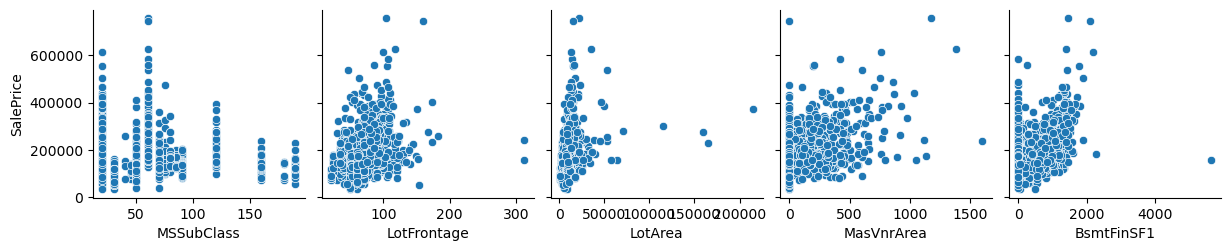

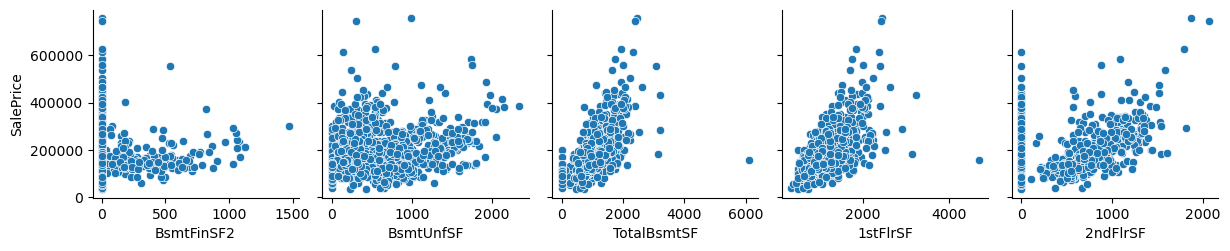

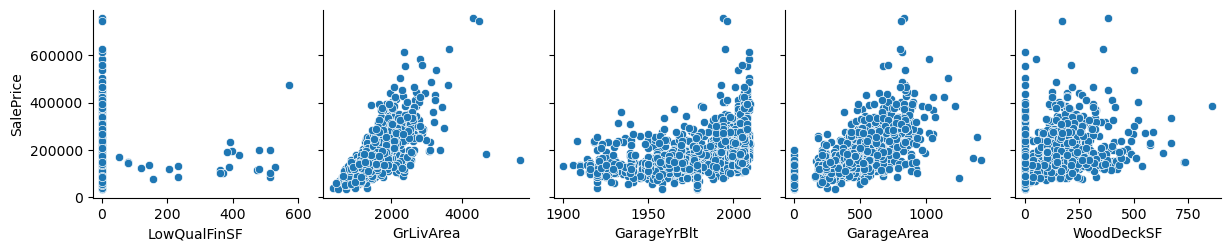

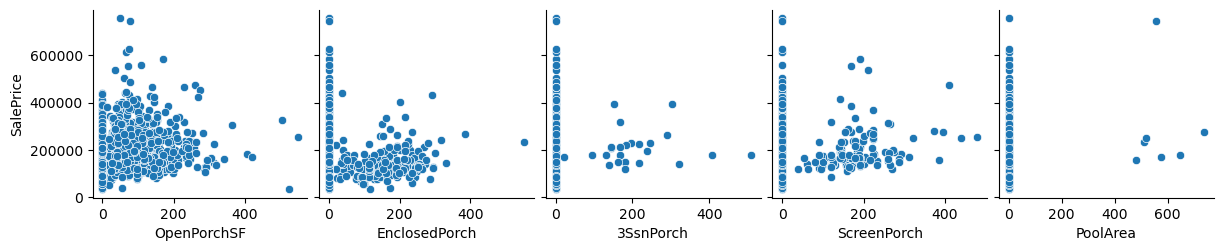

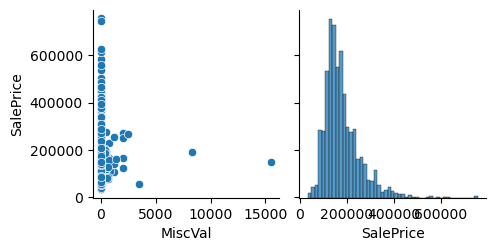

In [86]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

In [87]:
#  checking correlation of numeric variable with SalePrice

df_num_corr = df_num.corr()['SalePrice']
print(df_num_corr)

## features having high correlation with target variable (>0.5)
print("\nfeatures havinghigh correlation with target variable\n", df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False))

MSSubClass      -0.084284
LotFrontage      0.334901
LotArea          0.263843
MasVnrArea       0.475241
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
GarageYrBlt      0.470177
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
SalePrice        1.000000
Name: SalePrice, dtype: float64

features havinghigh correlation with target variable
 SalePrice      1.000000
GrLivArea      0.708624
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
Name: SalePrice, dtype: float64


In [88]:
# correlation matrix
cor = df_num.corr()
cor

MSSubClass  LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  \
MSSubClass       1.000000    -0.357056 -0.139781    0.022895   -0.069836   
LotFrontage     -0.357056     1.000000  0.306795    0.179283    0.215828   
LotArea         -0.139781     0.306795  1.000000    0.103960    0.214103   
MasVnrArea       0.022895     0.179283  0.103960    1.000000    0.263582   
BsmtFinSF1      -0.069836     0.215828  0.214103    0.263582    1.000000   
BsmtFinSF2      -0.065649     0.043340  0.111170   -0.072302   -0.050117   
BsmtUnfSF       -0.140759     0.122156 -0.002618    0.114184   -0.495251   
TotalBsmtSF     -0.238518     0.363358  0.260833    0.362452    0.522396   
1stFlrSF        -0.251758     0.414266  0.299475    0.342160    0.445863   
2ndFlrSF         0.307886     0.072483  0.050986    0.174019   -0.137079   
LowQualFinSF     0.046474     0.036849  0.004779   -0.069068   -0.064503   
GrLivArea        0.074853     0.368392  0.263116    0.389893    0.208171   
GarageYrBlt      0.080187     0.064324 -0.024812    0.249367    0.150338   
GarageArea      -0.098672     0.323663  0.180403    0.372567    0.296970   
WoodDeckSF      -0.012579     0.077106  0.171698    0.159349    0.204306   
OpenPorchSF     -0.006100     0.137454  0.084774    0.124965    0.111761   
EnclosedPorch   -0.012037     0.009790 -0.018340   -0.109849   -0.102303   
3SsnPorch       -0.043825     0.062335  0.020423    0.018795    0.026451   
ScreenPorch     -0.026030     0.037684  0.043160    0.061453    0.062021   
PoolArea         0.008283     0.180868  0.077672    0.011723    0.140491   
MiscVal         -0.007683     0.001168  0.038068   -0.029815    0.003571   
SalePrice       -0.084284     0.334901  0.263843    0.475241    0.386420   

               BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  \
MSSubClass      -0.065649  -0.140759    -0.238518 -0.251758  0.307886  ...   
LotFrontage      0.043340   0.122156     0.363358  0.414266  0.072483  ...   
LotArea          0.111170  -0.002618     0.260833  0.299475  0.050986  ...   
MasVnrArea      -0.072302   0.114184     0.362452  0.342160  0.174019  ...   
BsmtFinSF1      -0.050117  -0.495251     0.522396  0.445863 -0.137079  ...   
BsmtFinSF2       1.000000  -0.209294     0.104810  0.097117 -0.099260  ...   
BsmtUnfSF       -0.209294   1.000000     0.415360  0.317987  0.004469  ...   
TotalBsmtSF      0.104810   0.415360     1.000000  0.819530 -0.174512  ...   
1stFlrSF         0.097117   0.317987     0.819530  1.000000 -0.202646  ...   
2ndFlrSF        -0.099260   0.004469    -0.174512 -0.202646  1.000000  ...   
LowQualFinSF     0.014807   0.028167    -0.033245 -0.014241  0.063353  ...   
GrLivArea       -0.009640   0.240257     0.454868  0.566024  0.687501  ...   
GarageYrBlt     -0.087126   0.186098     0.311700  0.227127  0.069315  ...   
GarageArea      -0.018227   0.183303     0.486665  0.489782  0.138347  ...   
WoodDeckSF       0.067898  -0.005316     0.232019  0.235459  0.092165  ...   
OpenPorchSF      0.003093   0.129005     0.247264  0.211671  0.208026  ...   
EnclosedPorch    0.036543  -0.002538    -0.095478 -0.065292  0.061989  ...   
3SsnPorch       -0.029993   0.020764     0.037384  0.056104 -0.024358  ...   
ScreenPorch      0.088871  -0.012579     0.084489  0.088758  0.040606  ...   
PoolArea         0.041709  -0.035092     0.126053  0.131525  0.081487  ...   
MiscVal          0.004940  -0.023837    -0.018479 -0.021096  0.016197  ...   
SalePrice       -0.011378   0.214479     0.613581  0.605852  0.319334  ...   

               GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  \
MSSubClass        0.080187   -0.098672   -0.012579    -0.006100   
LotFrontage       0.064324    0.323663    0.077106     0.137454   
LotArea          -0.024812    0.180403    0.171698     0.084774   
MasVnrArea        0.249367    0.372567    0.159349     0.124965   
BsmtFinSF1        0.150338    0.296970    0.204306     0.111761   
BsmtFinSF2       -0.087126   -0.018227    0.067898     0.003093   
Bs

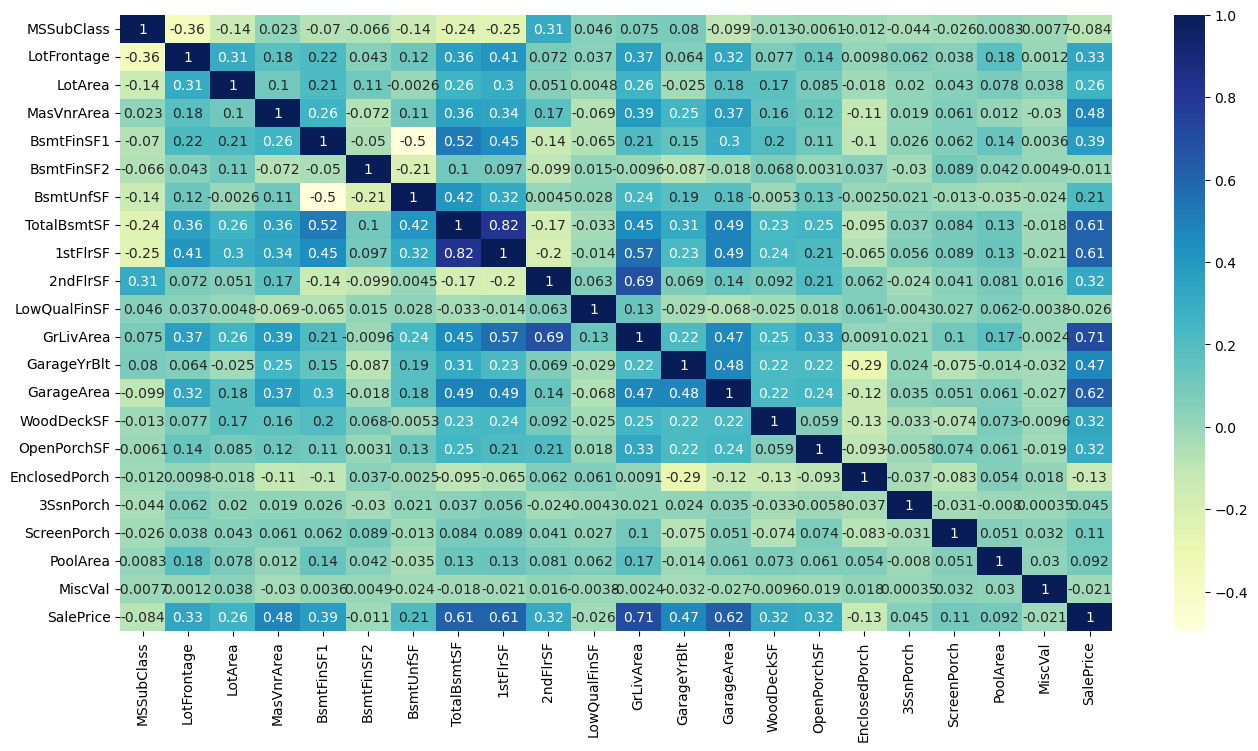

In [89]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


Note:
features havinghigh correlation with target variable (>0.5)
- GrLivArea       0.711706
- GarageArea      0.607535
- 1stFlrSF        0.604714
- TotalBsmtSF     0.602042
- YearBuilt       0.504297
- YearRemodAdd    0.501435

Note:
Correlation among independent variables:
- for example GarageArea and GrLivArea are positively correlated 


#### Visualising Categorical Variables

for the categorical variables, making  barplots and boxplots with respect to the target variable 

In [90]:
df_cat = df_clean.select_dtypes(include=['object'])

In [91]:
df_cat.head()  ## there are 51 categorical columns

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... GarageType GarageFinish GarageCars  \
0      CollgCr       Norm       Norm  ...     Attchd          RFn          2   
1      Veenker      Feedr       Norm  ...     Attchd          RFn          2   
2      CollgCr       Norm       Norm  ...     Attchd          RFn          2   
3      Crawfor       Norm       Norm  ...     Detchd          Unf          3   
4      NoRidge       Norm       Norm  ...     Attchd          RFn          3   

  GarageQual GarageCond PavedDrive MoSold YrSold SaleType SaleCondition  
0         TA         TA          Y      2   2008       WD        Normal  
1         TA         TA          Y      5   2007       WD        Normal  
2         TA         TA          Y      9   2008       WD        Normal  
3         TA         TA          Y      2   2006       WD       Abnorml  
4         TA         TA          Y     12   2008       WD        Normal  

[5 rows x 51 columns]

In [92]:
# checking the unique values for the categorical columns
for i in df_cat:
    print(df_clean[i].unique())


['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
[7 6 8 5 9 4 10 3 1 2]
[5 8 6 7 4 2 3 9 1]
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['Viny

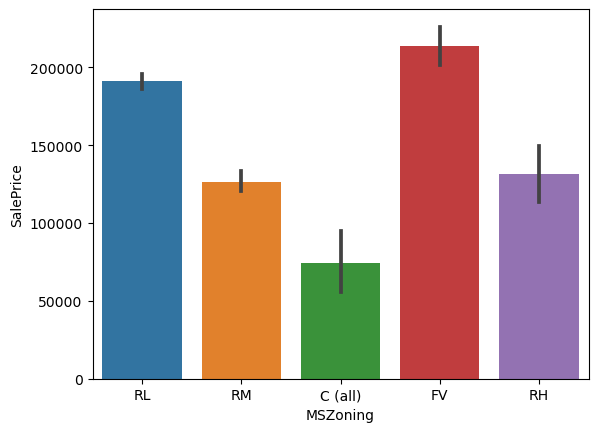

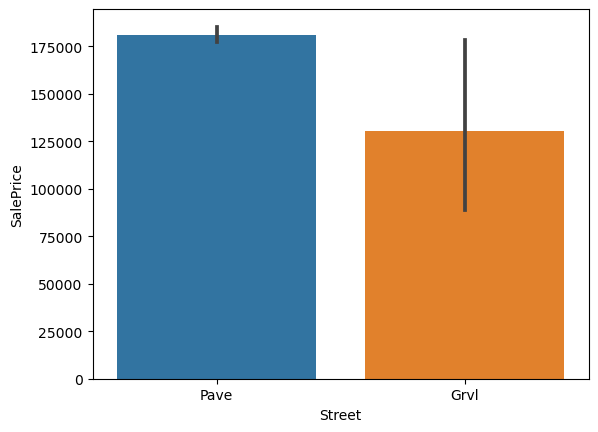

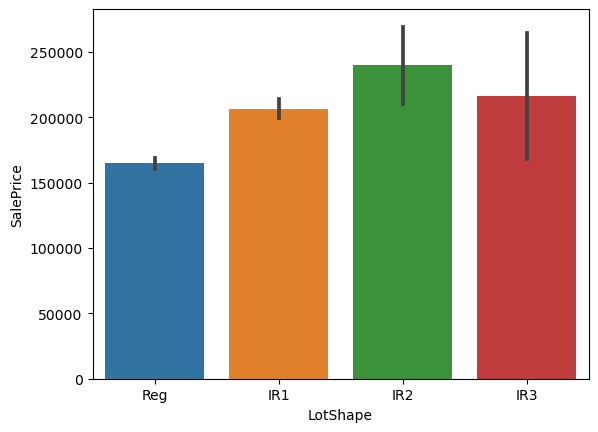

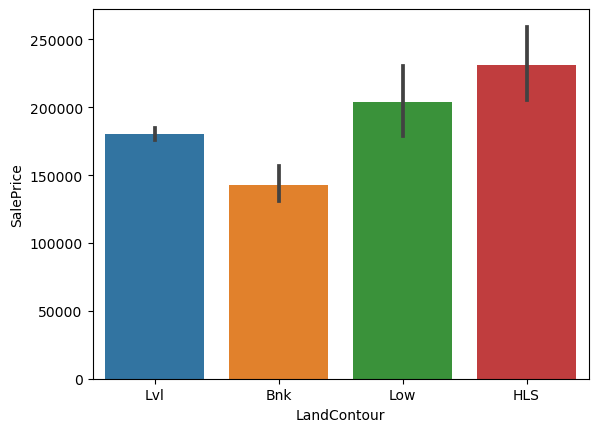

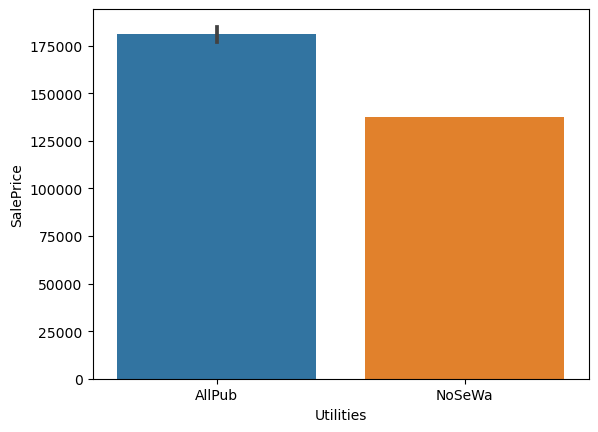

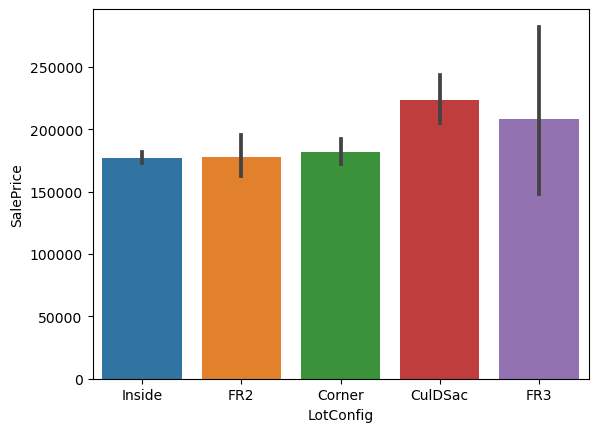

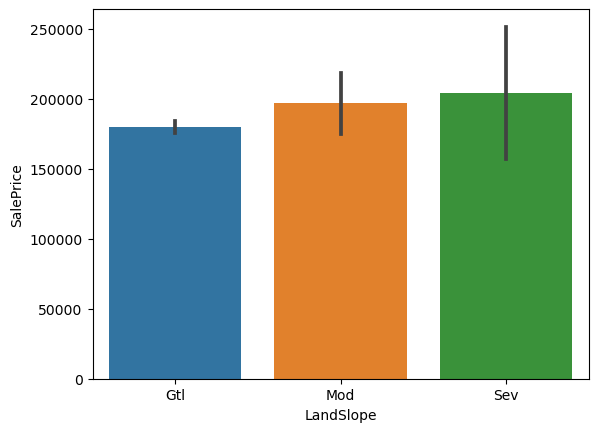

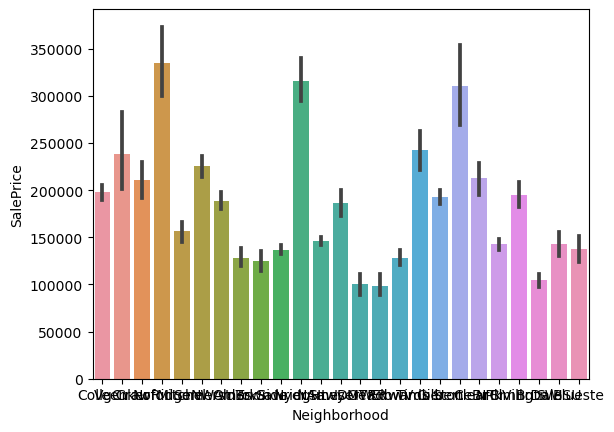

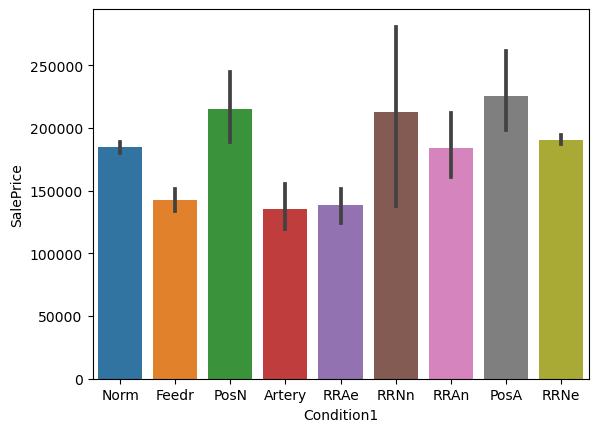

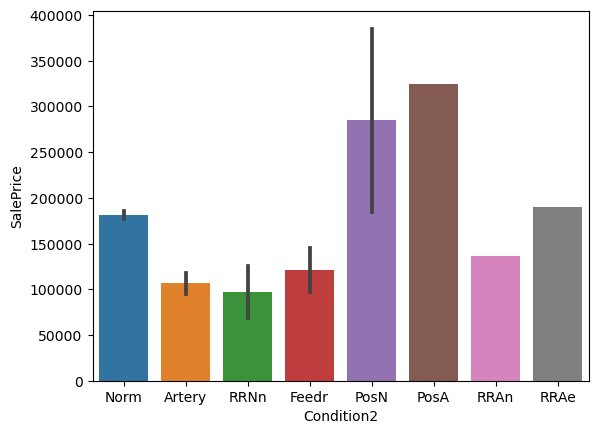

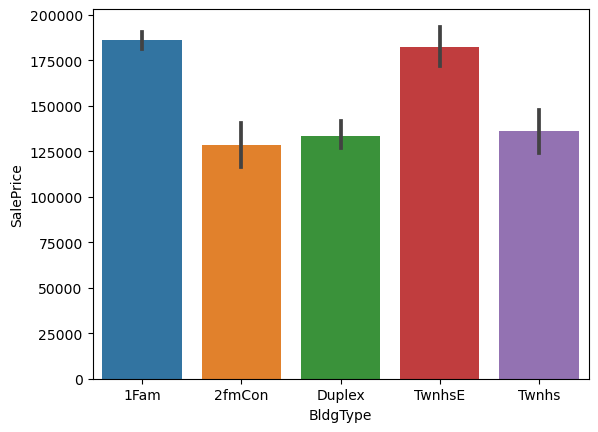

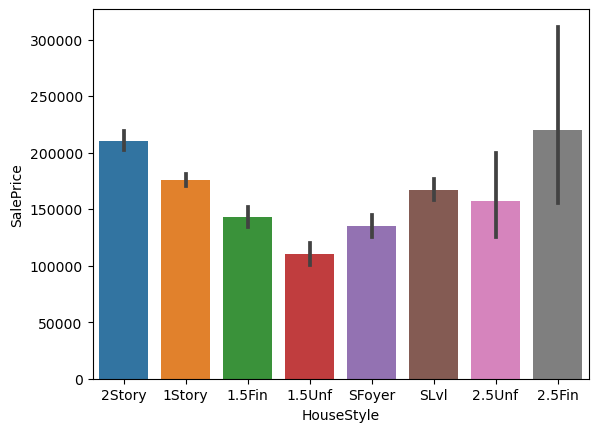

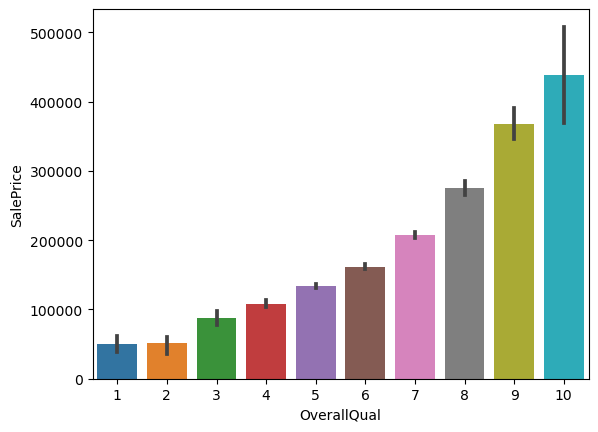

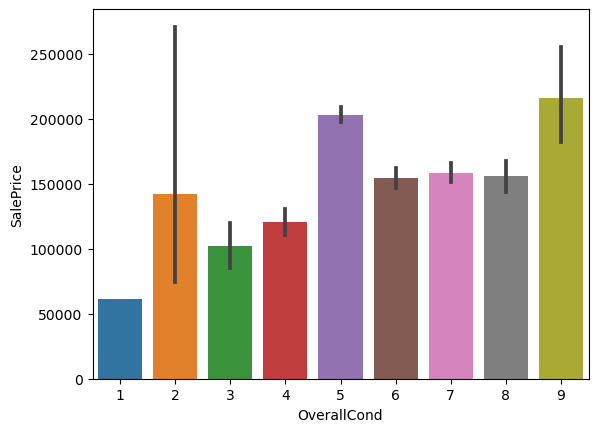

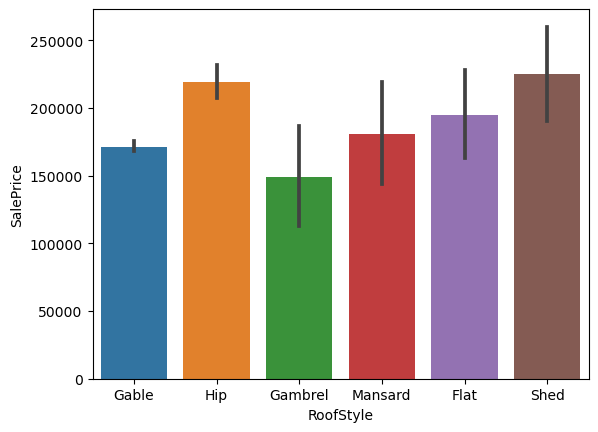

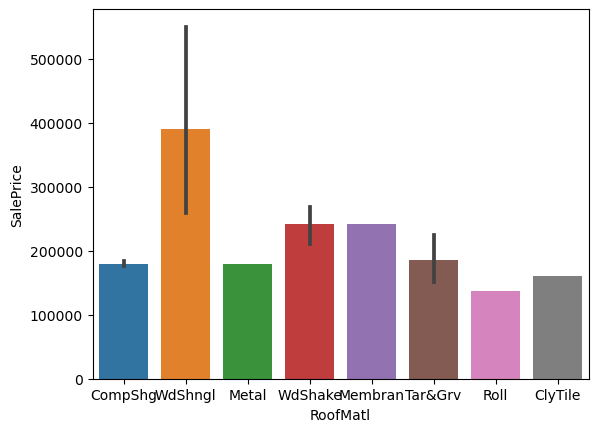

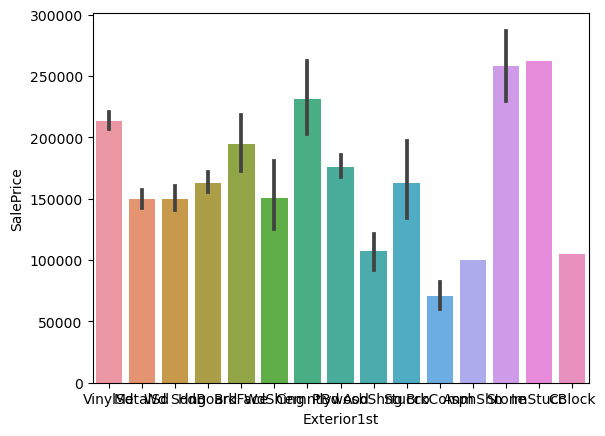

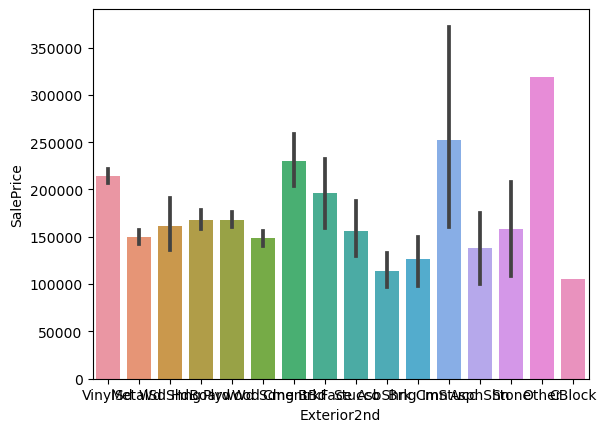

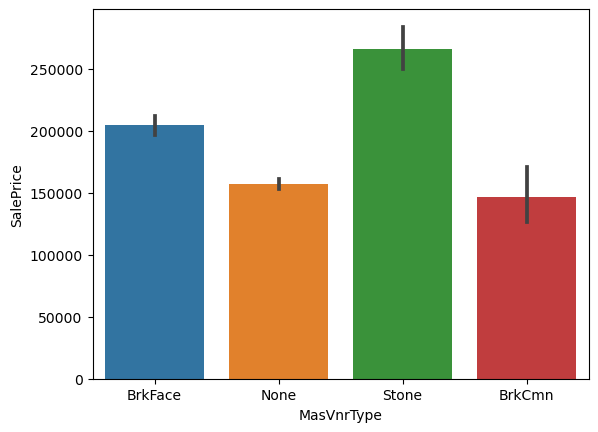

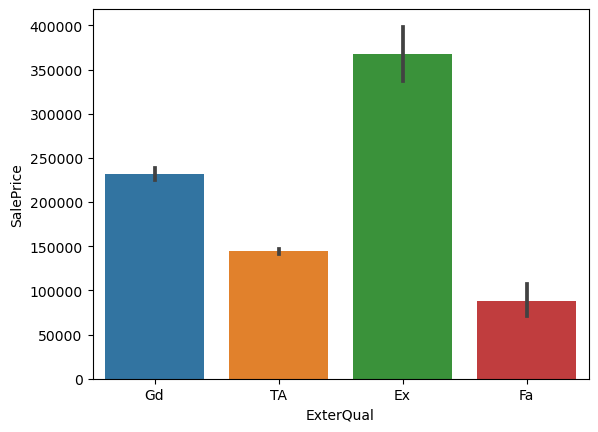

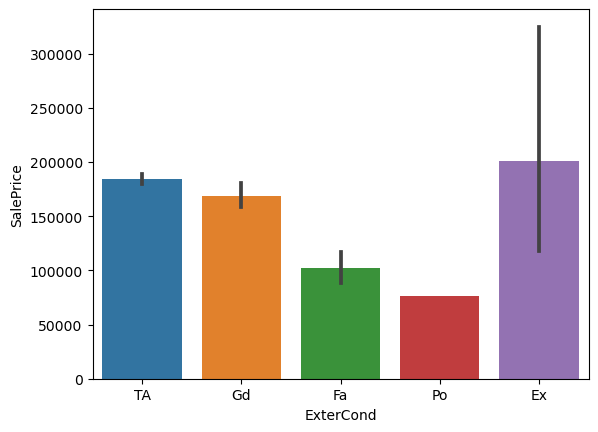

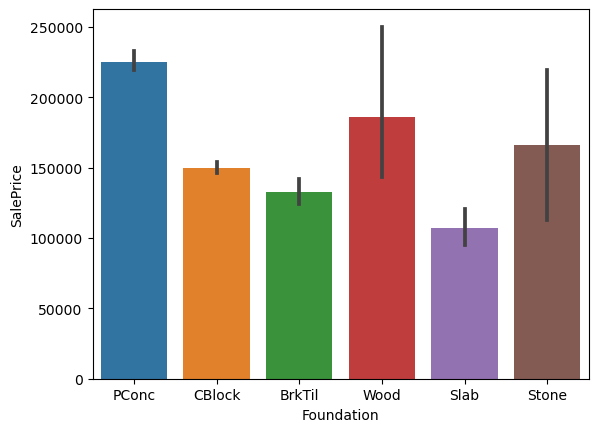

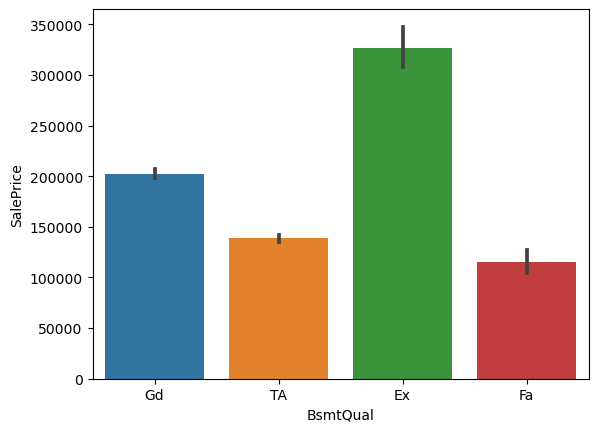

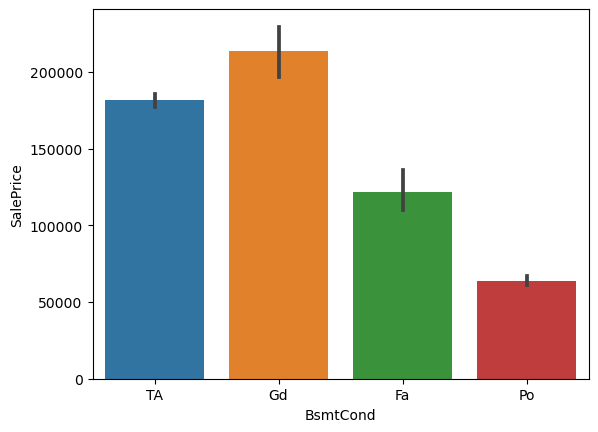

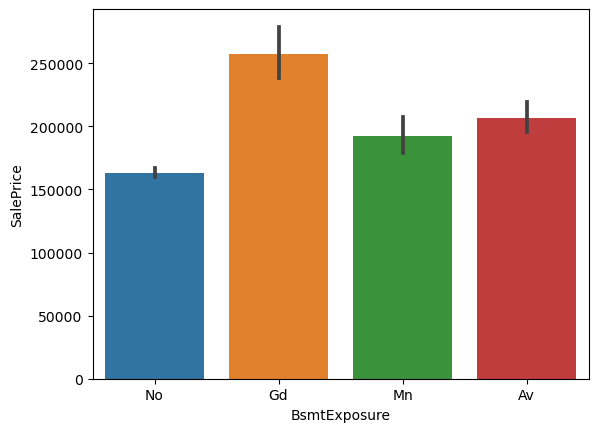

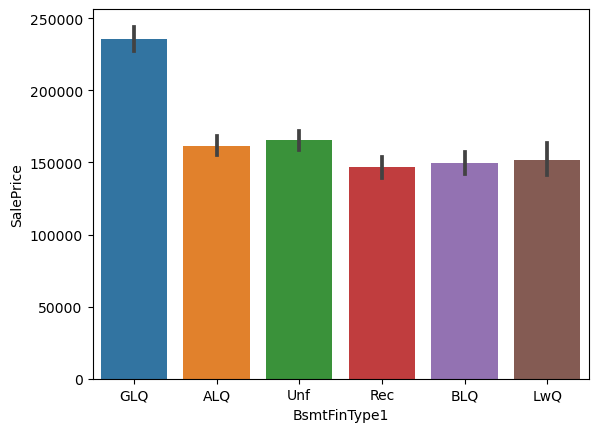

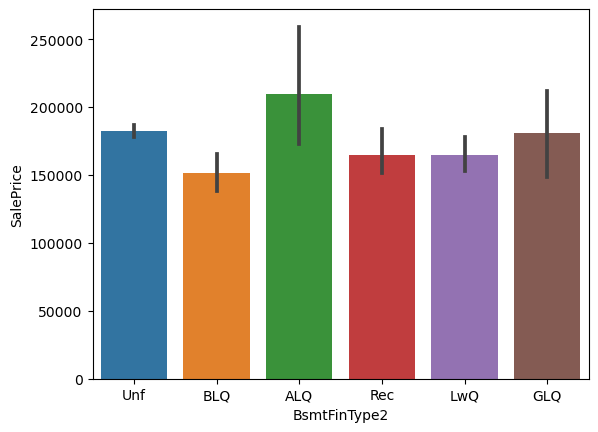

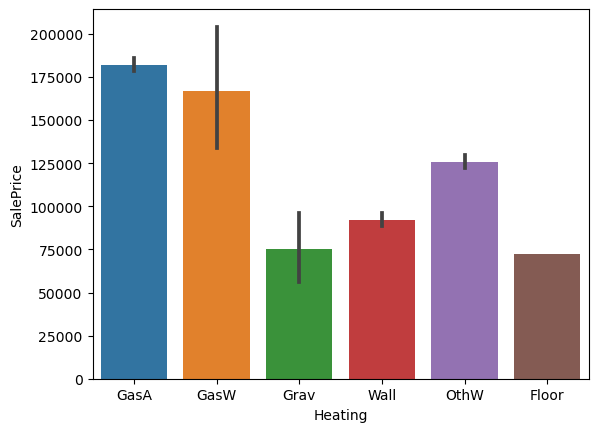

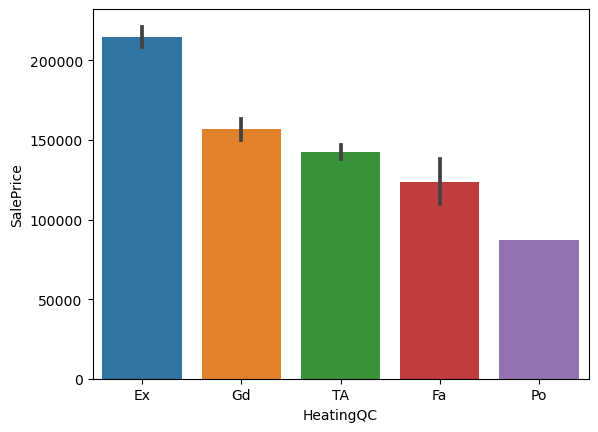

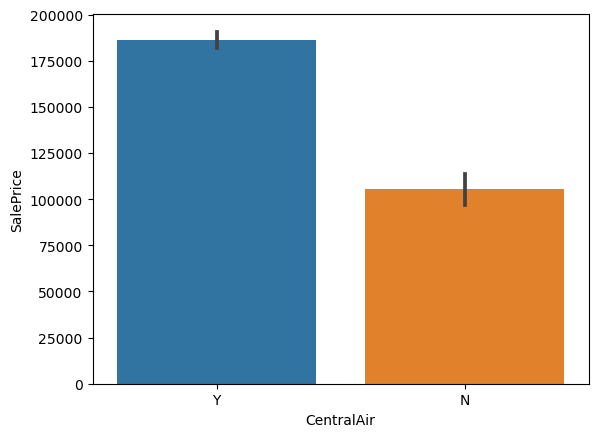

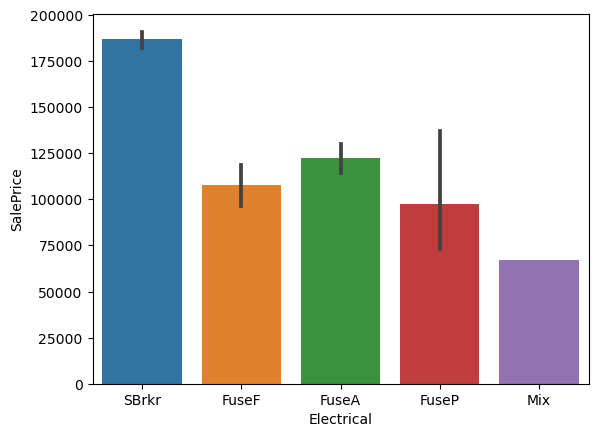

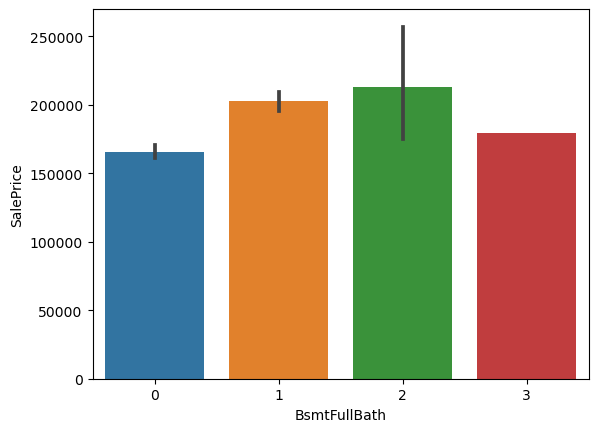

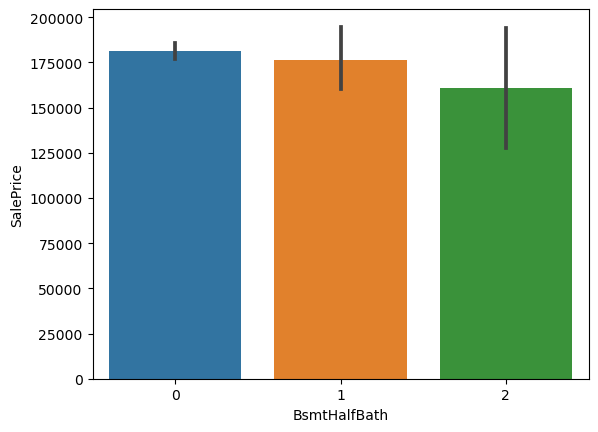

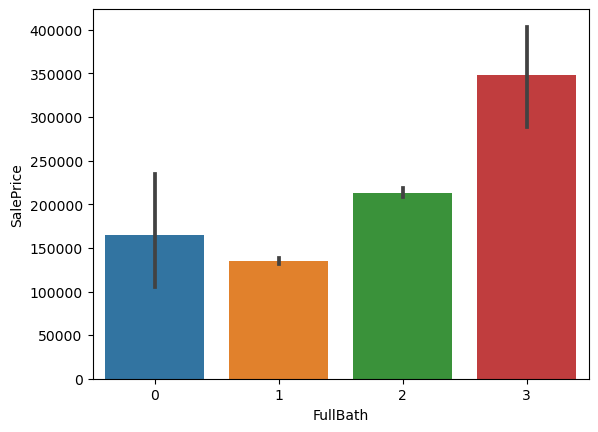

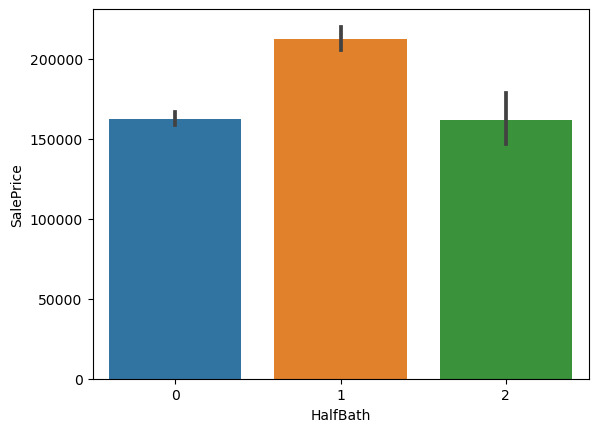

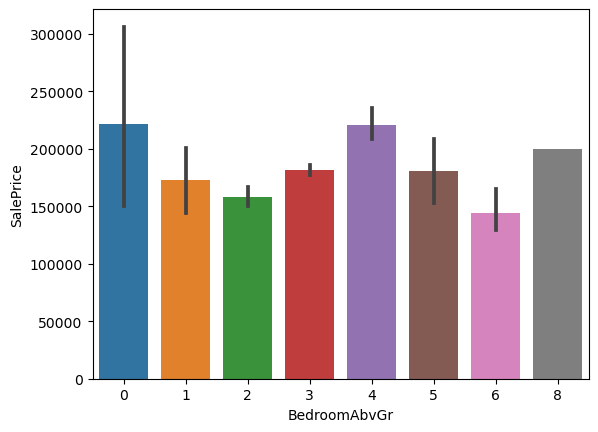

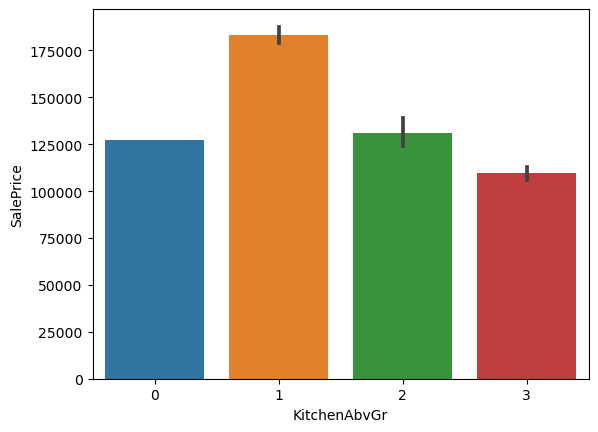

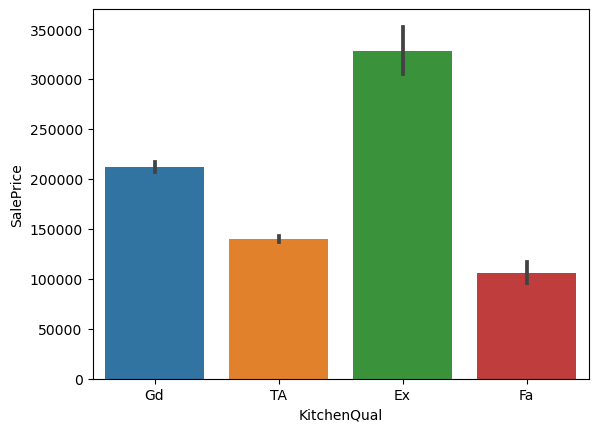

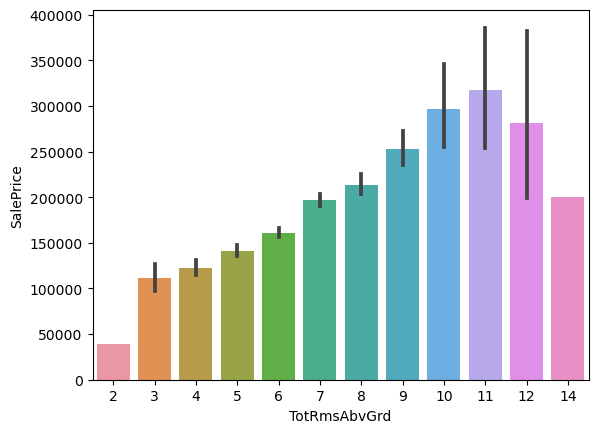

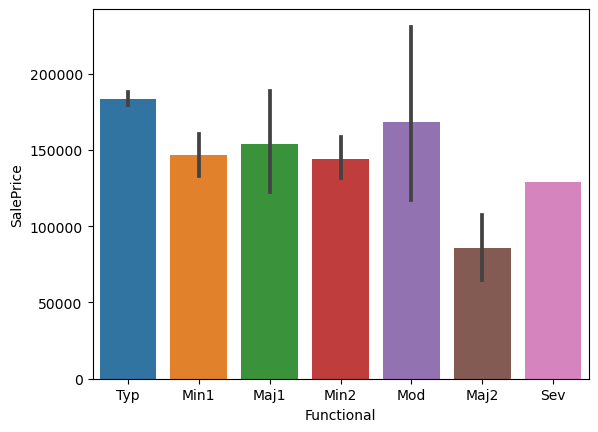

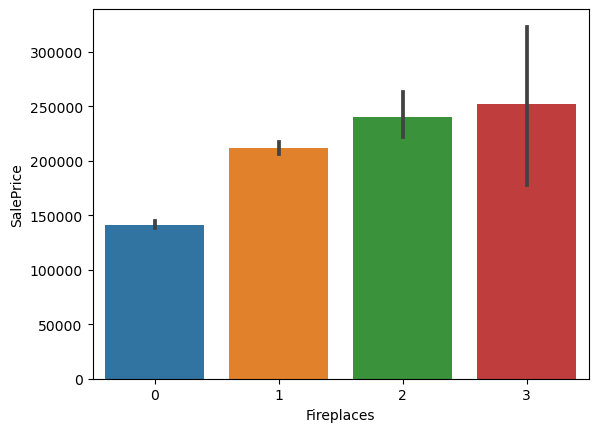

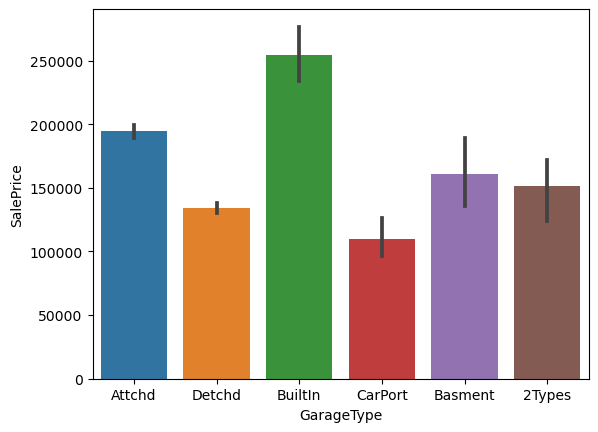

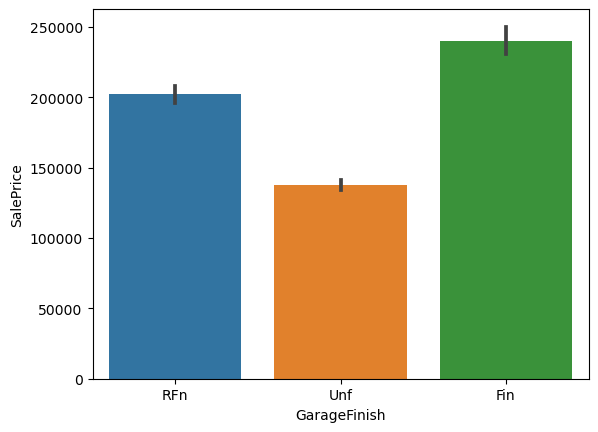

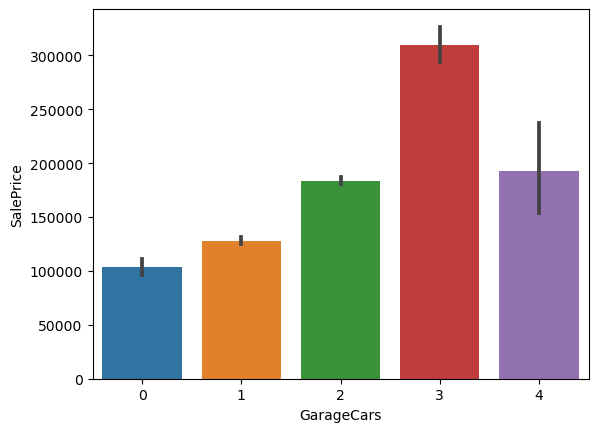

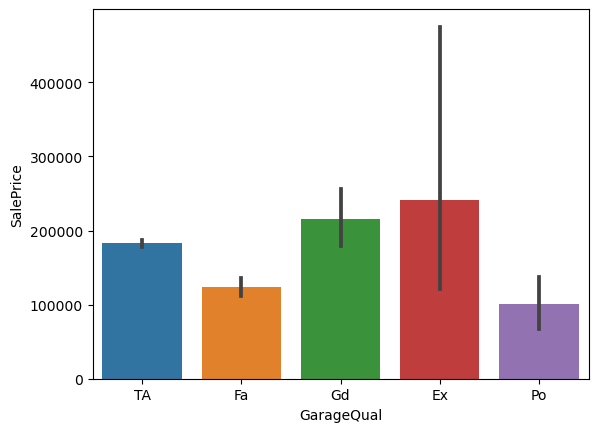

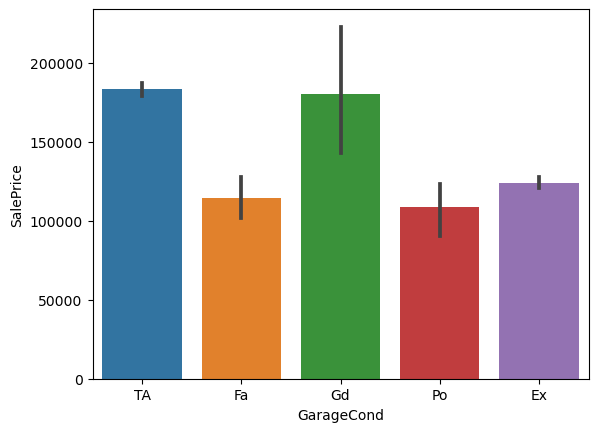

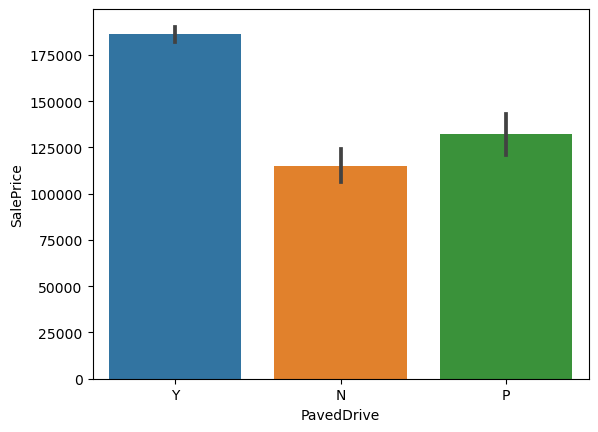

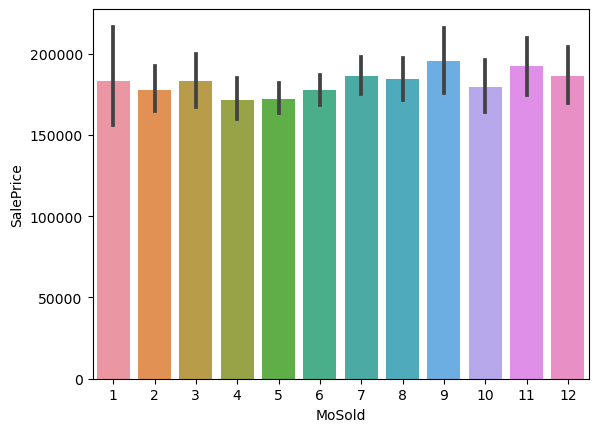

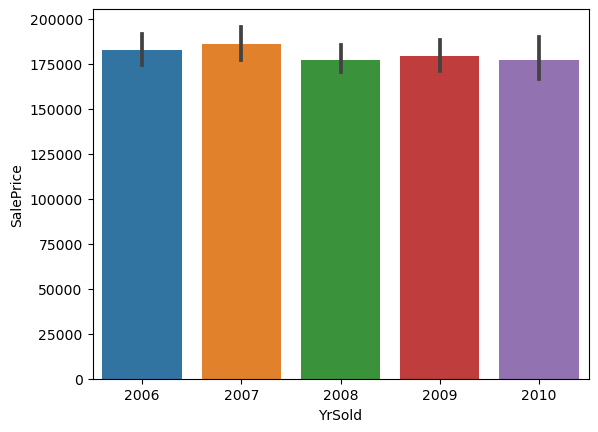

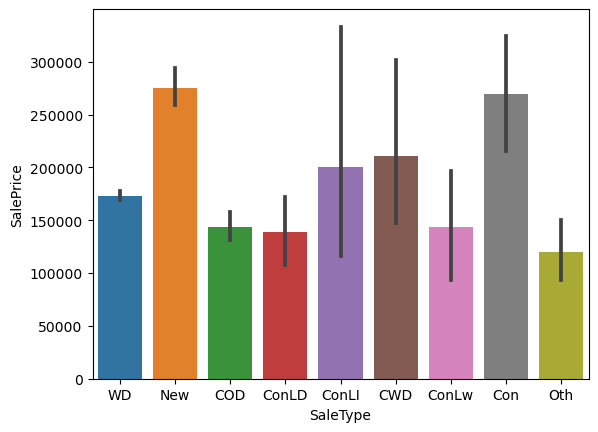

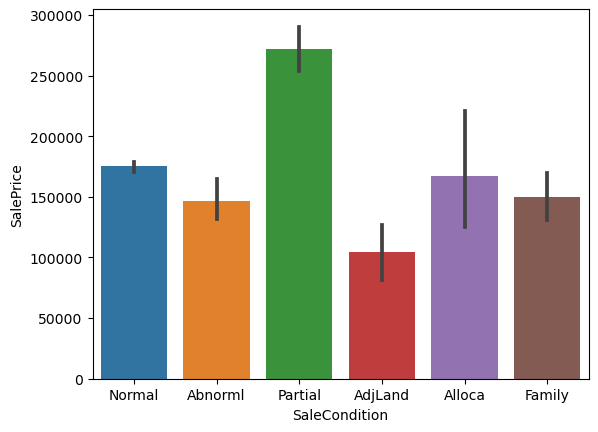

In [93]:
## creating barplots
for i in df_cat:
    sns.barplot(x = df_clean[i], y = df_clean['SalePrice'], data = df_clean)
    plt.show()


Note:
With categorical variables like BsmtFullBath,fireplaces,OverallQual etc. there seems like a increase in average sales with increase in values

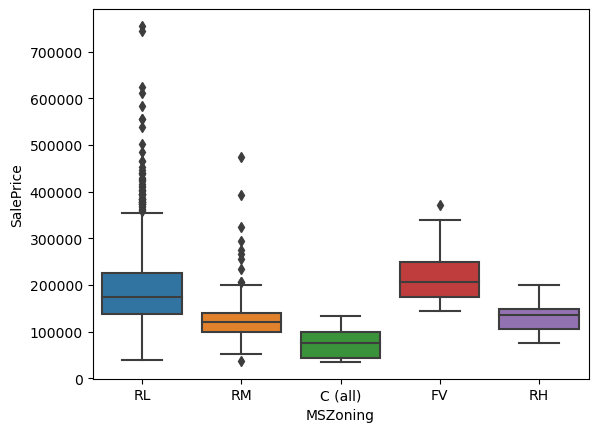

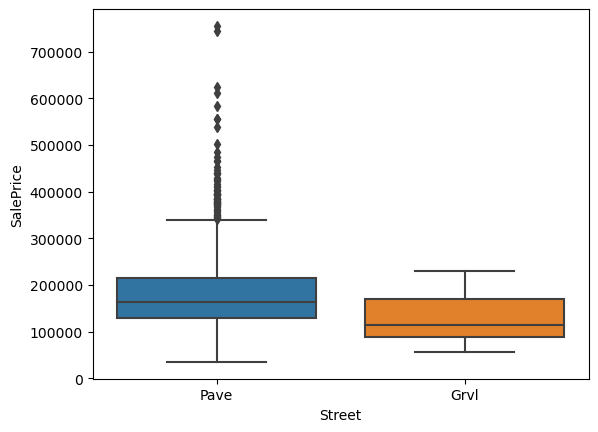

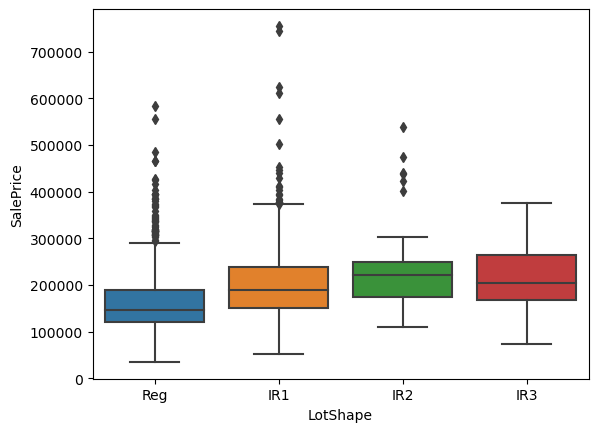

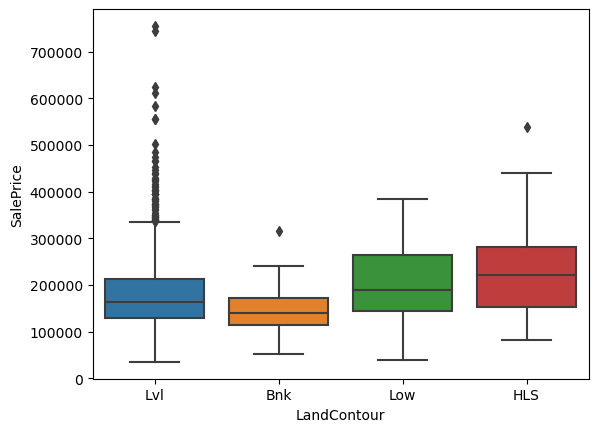

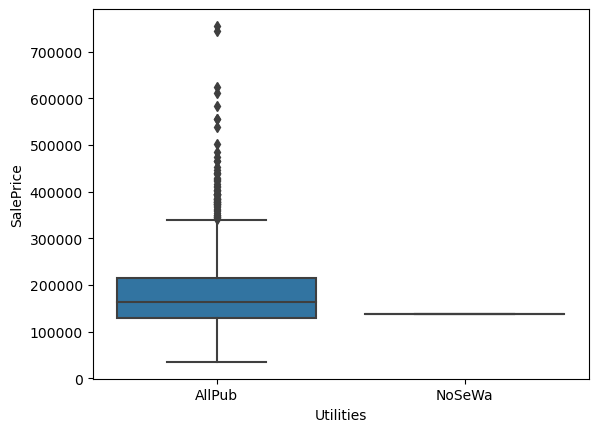

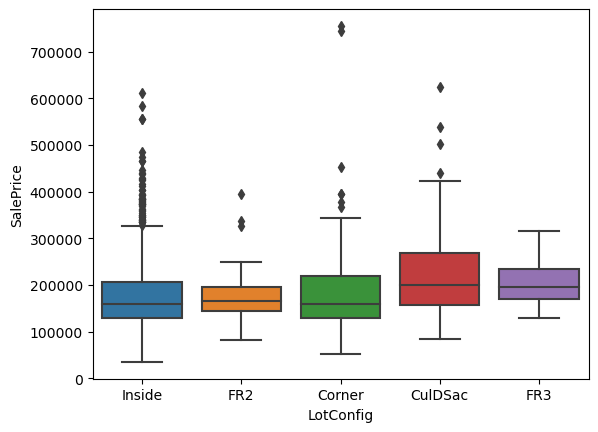

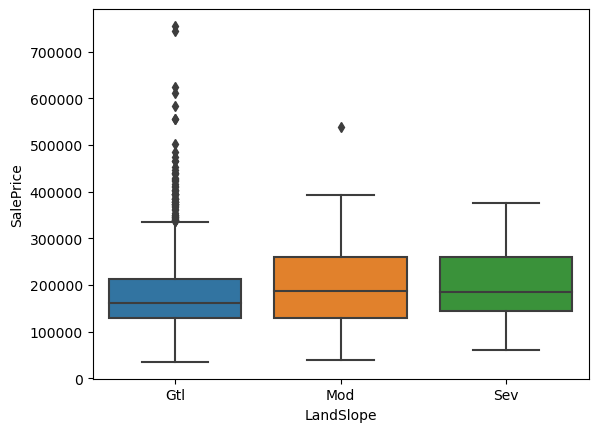

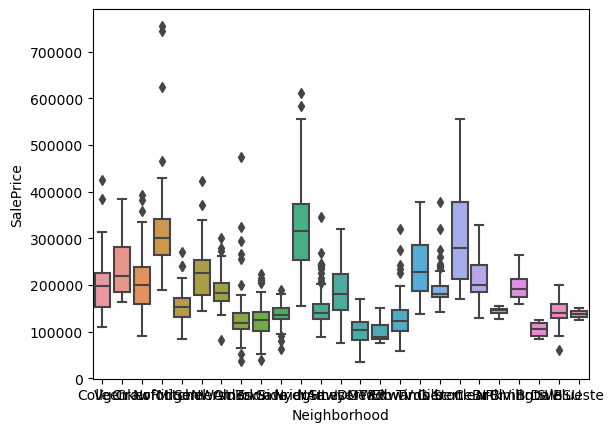

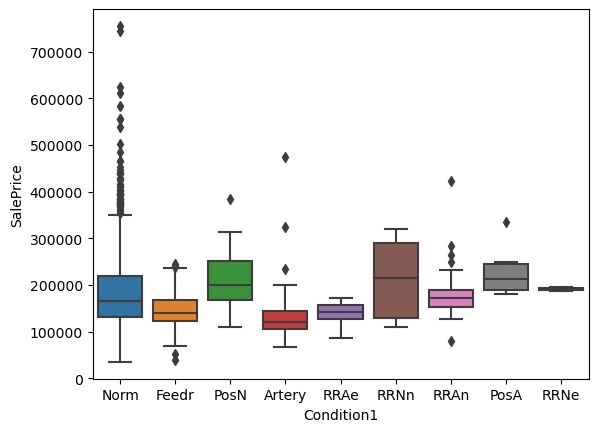

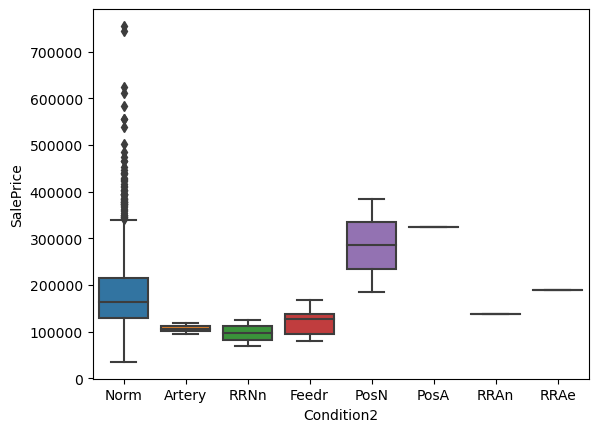

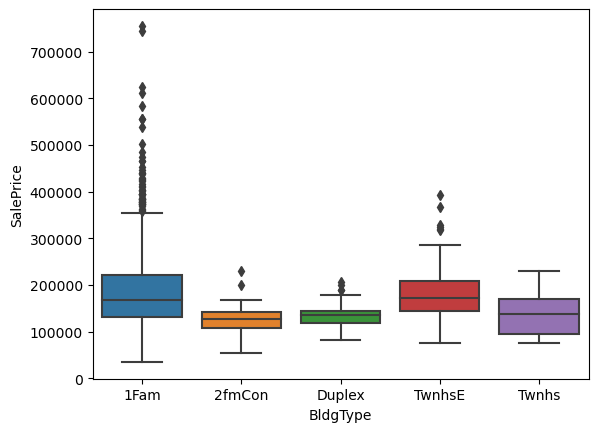

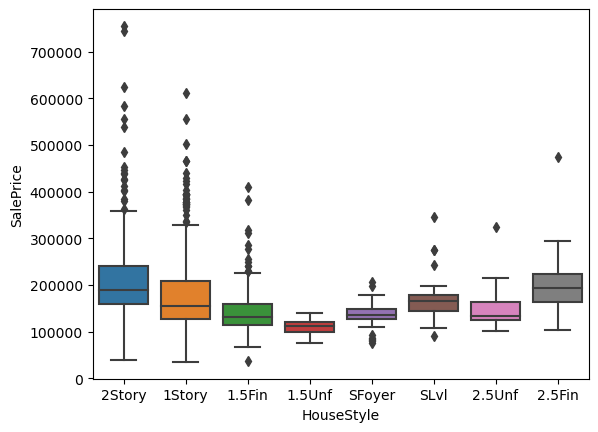

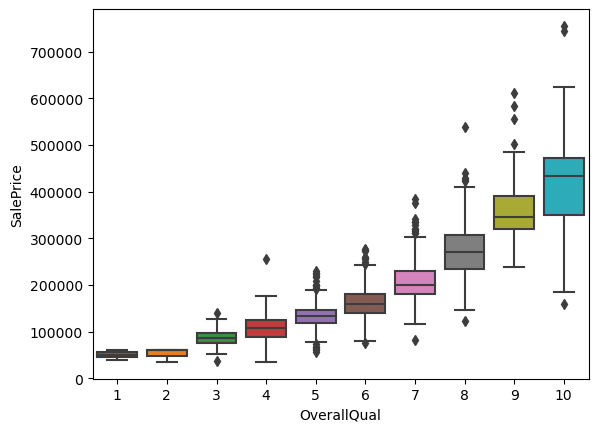

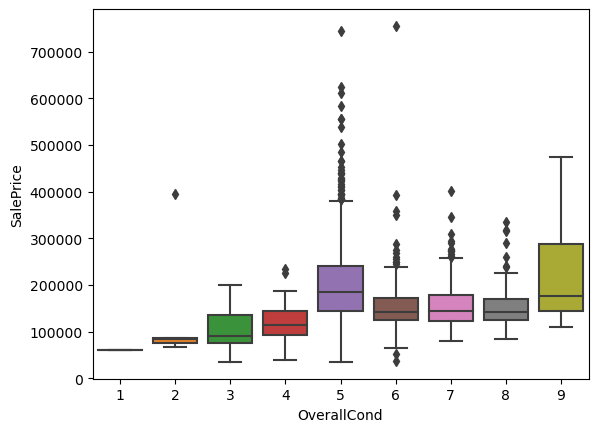

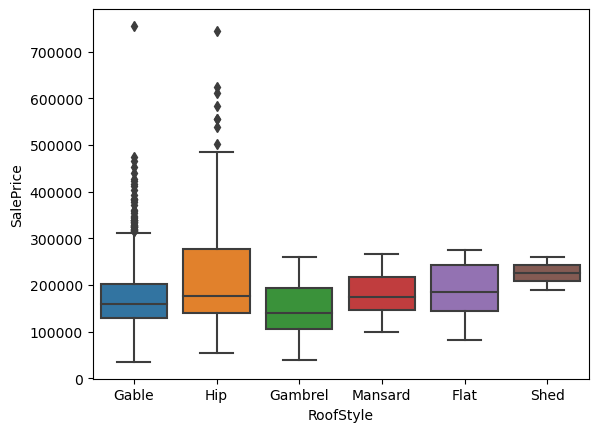

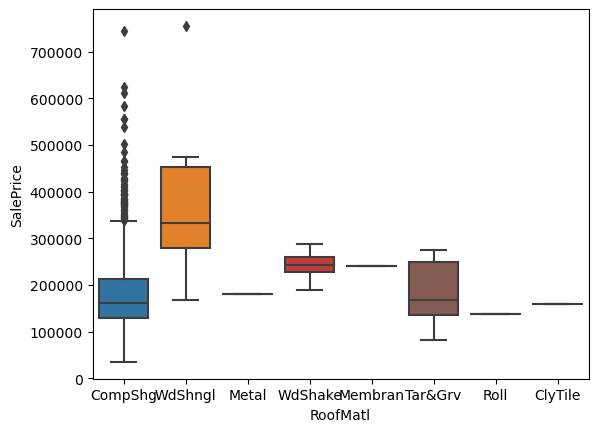

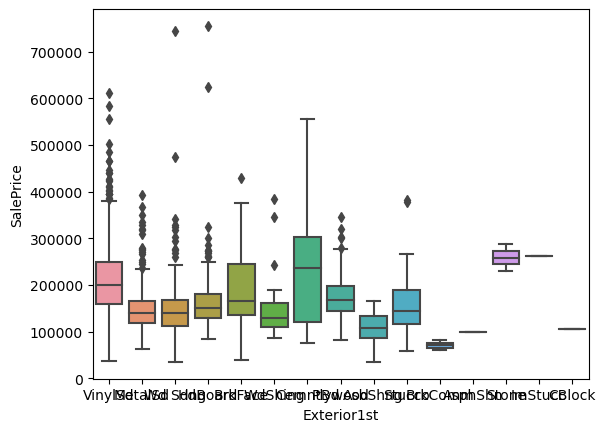

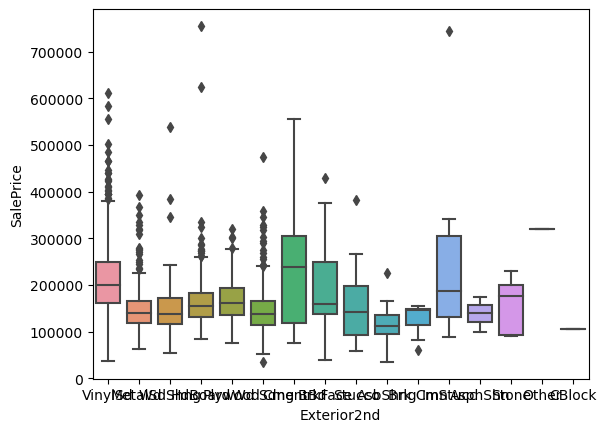

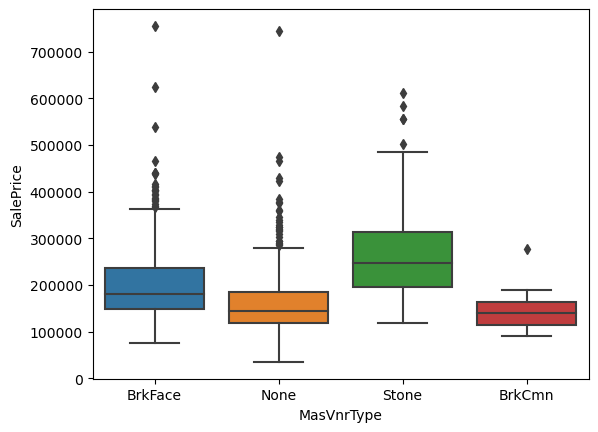

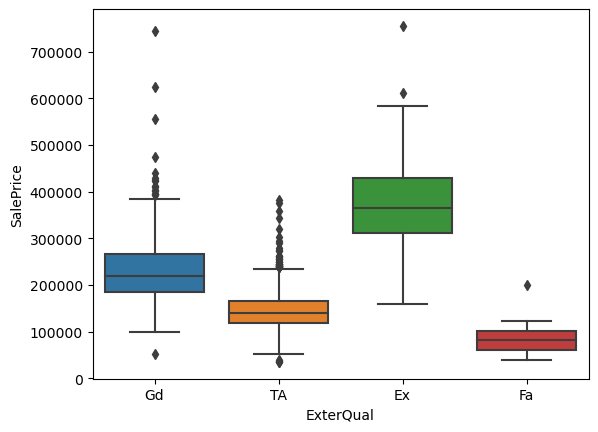

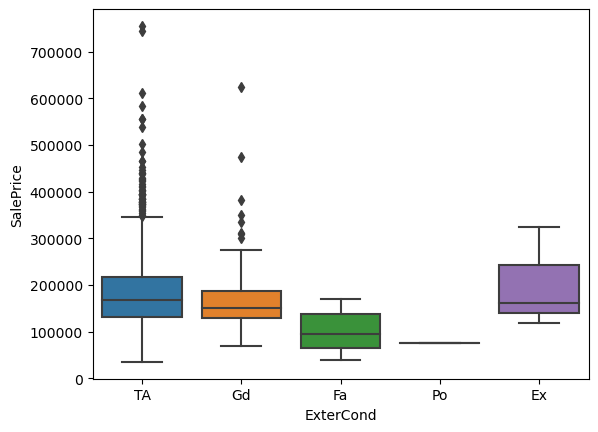

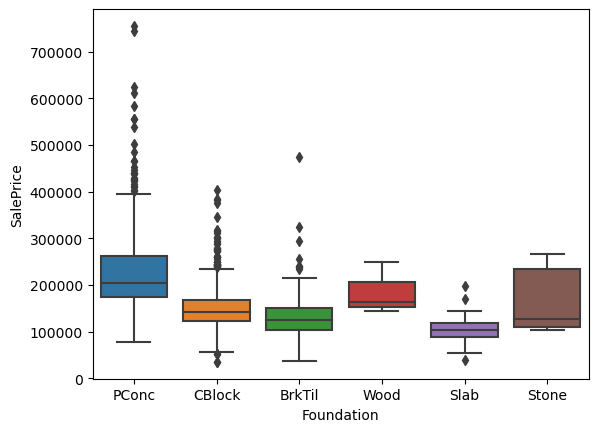

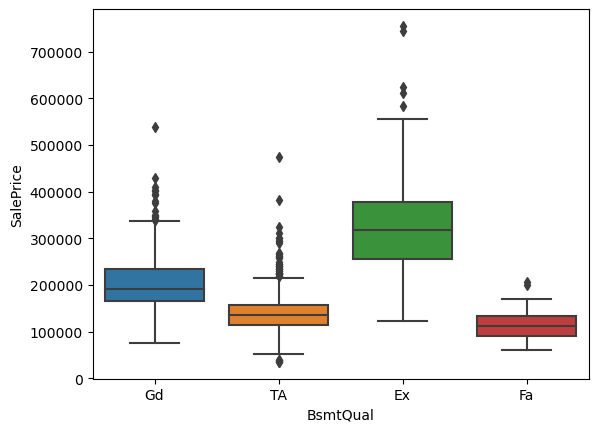

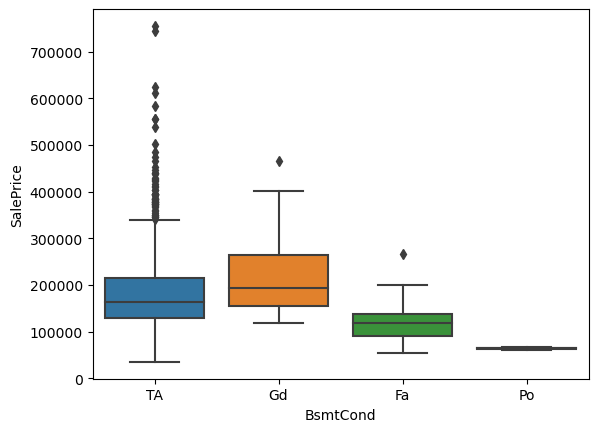

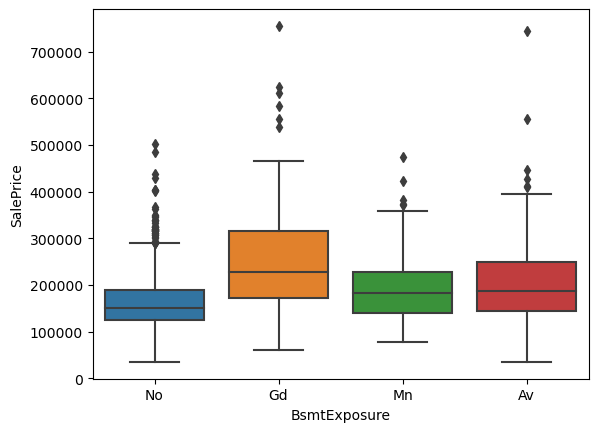

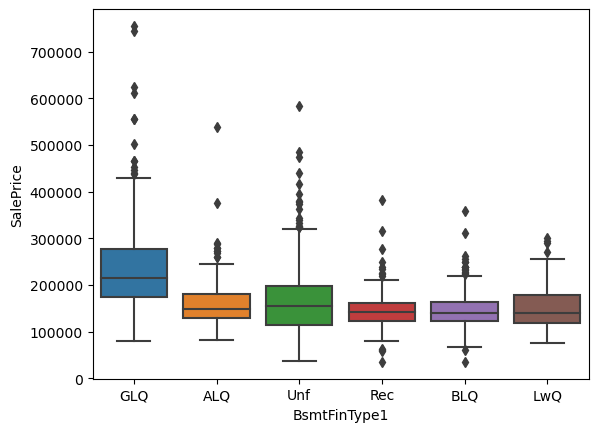

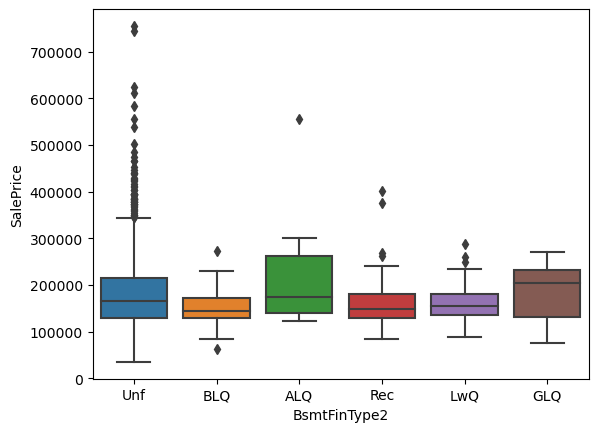

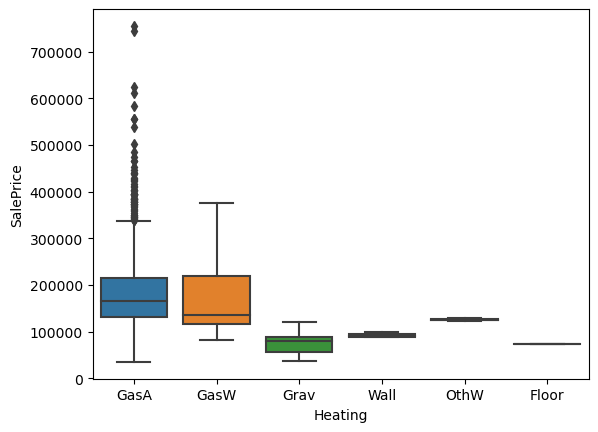

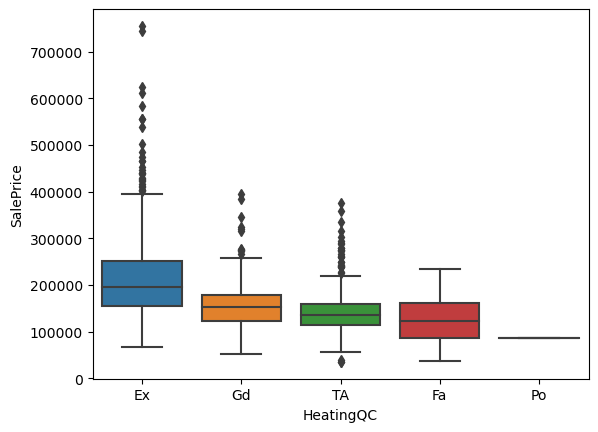

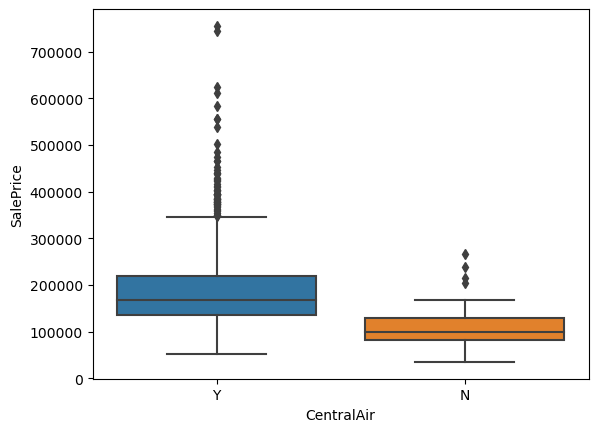

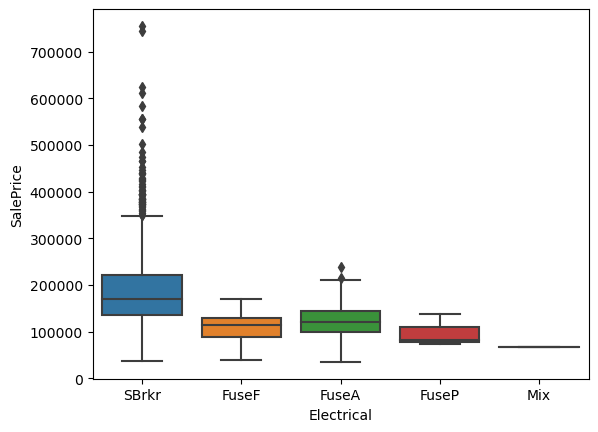

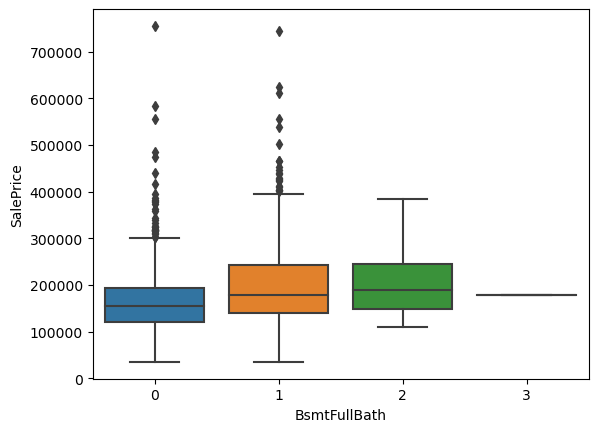

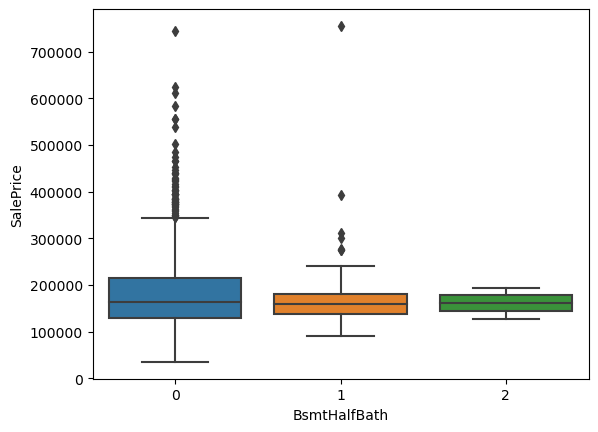

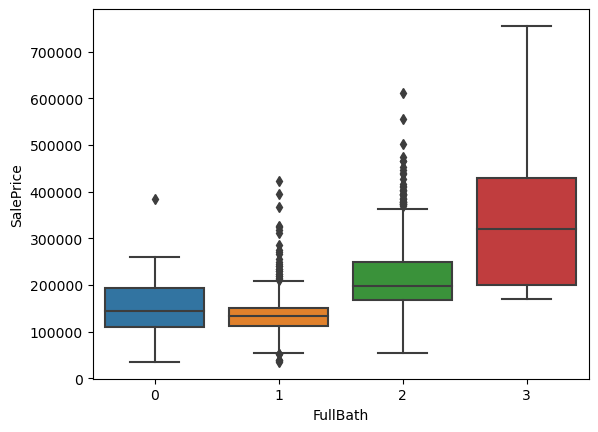

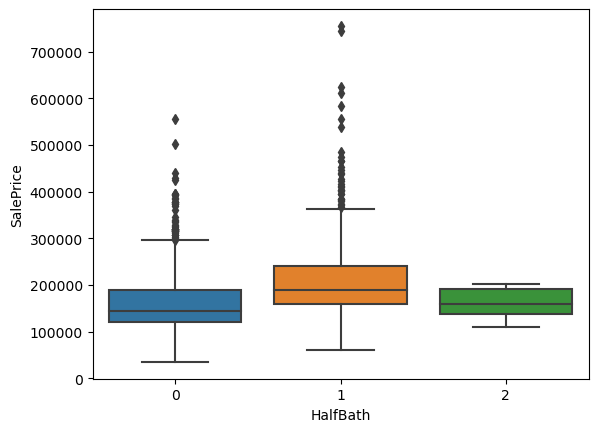

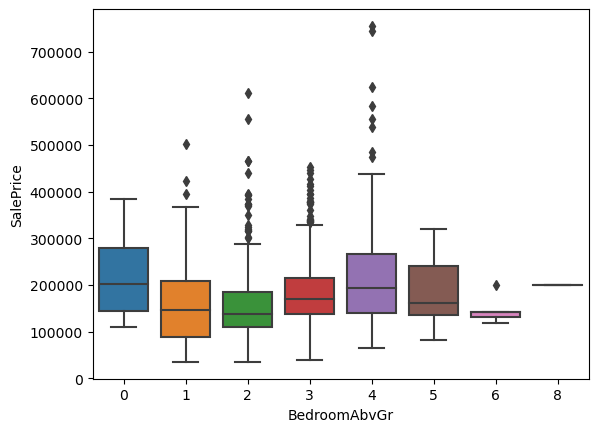

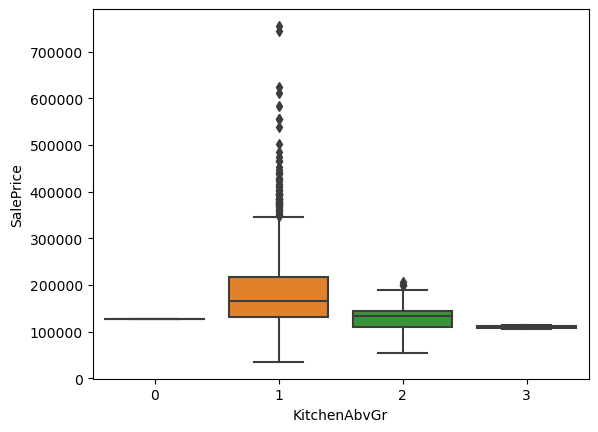

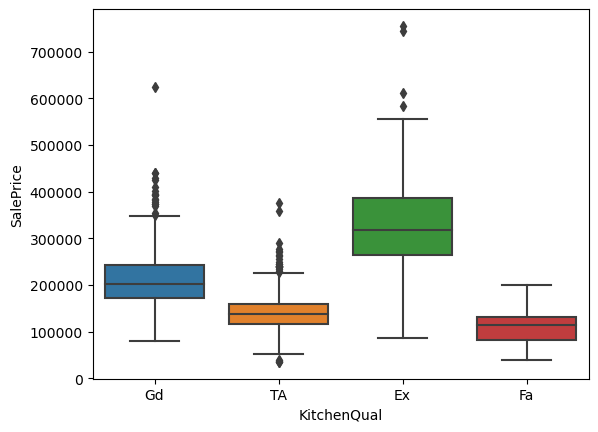

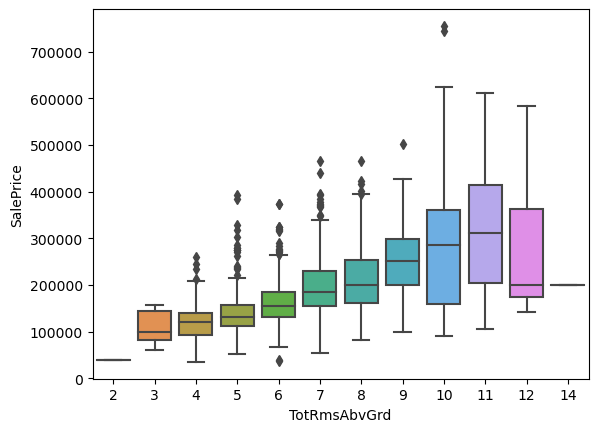

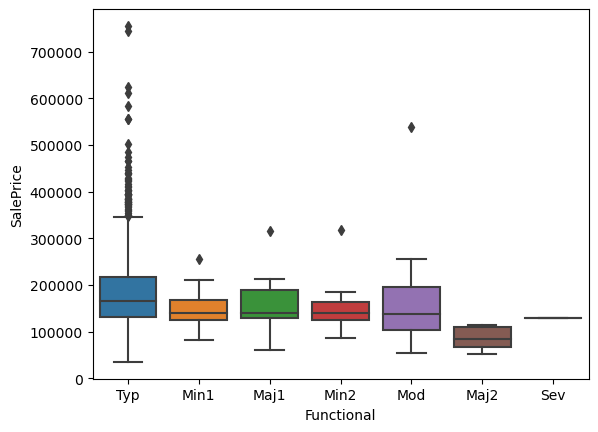

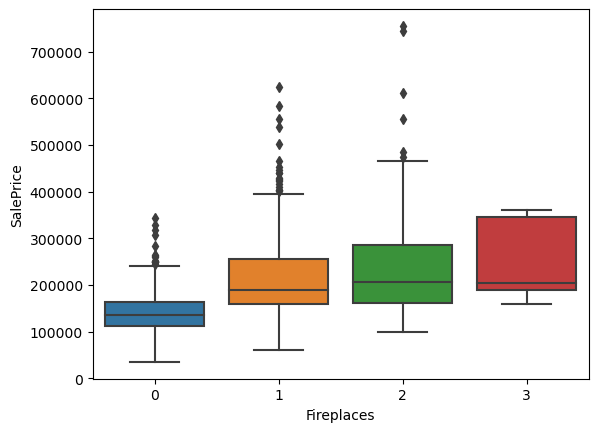

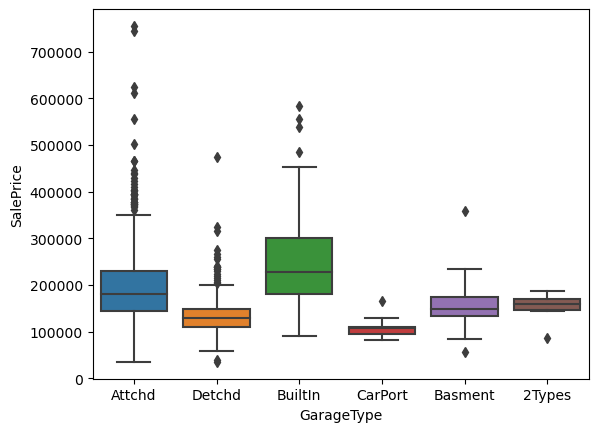

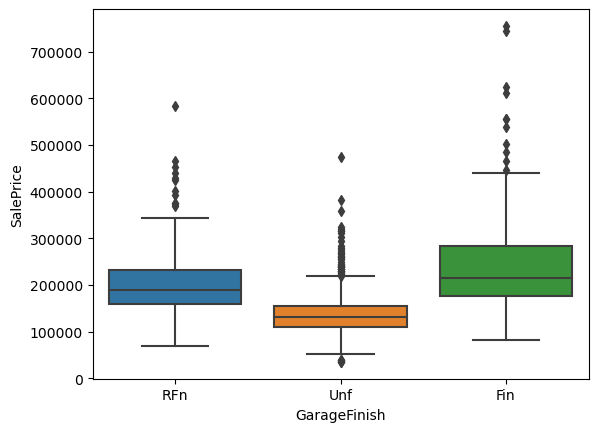

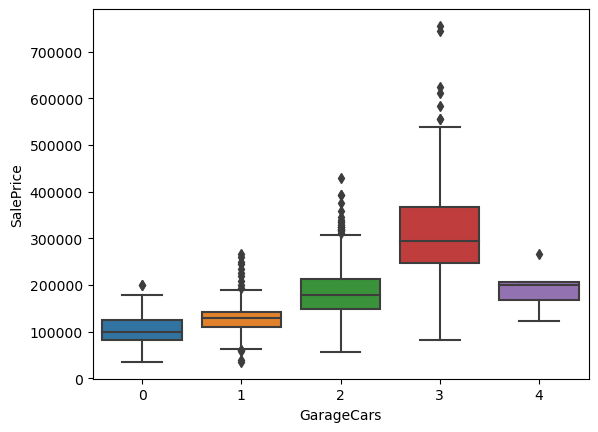

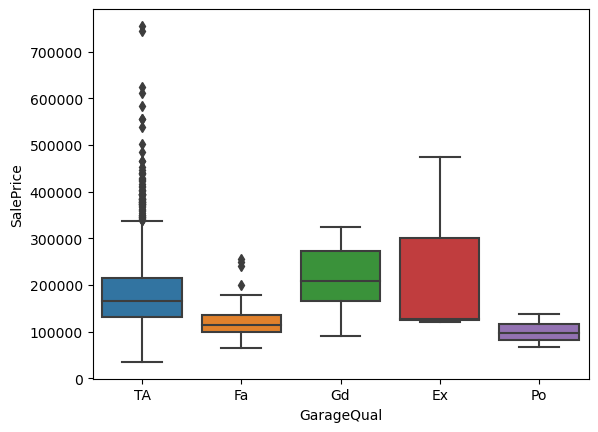

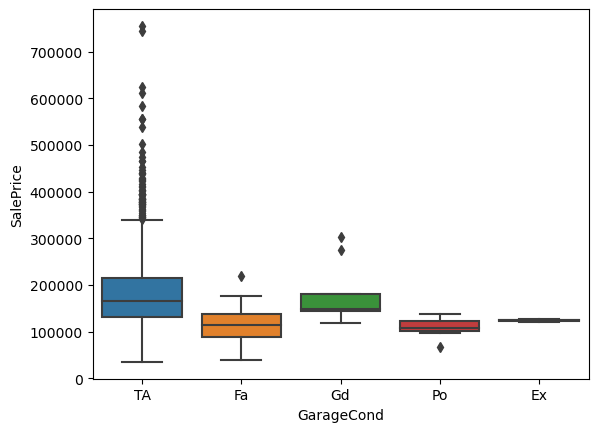

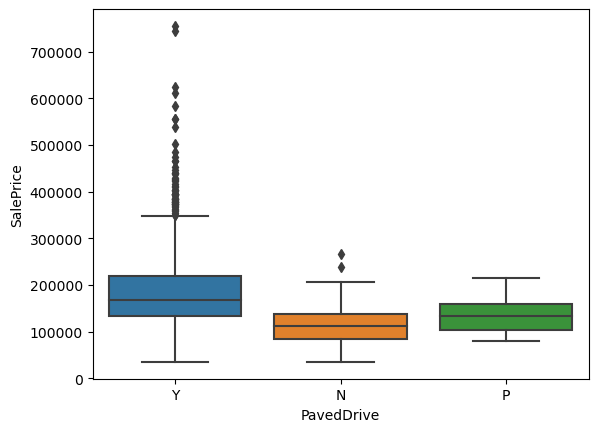

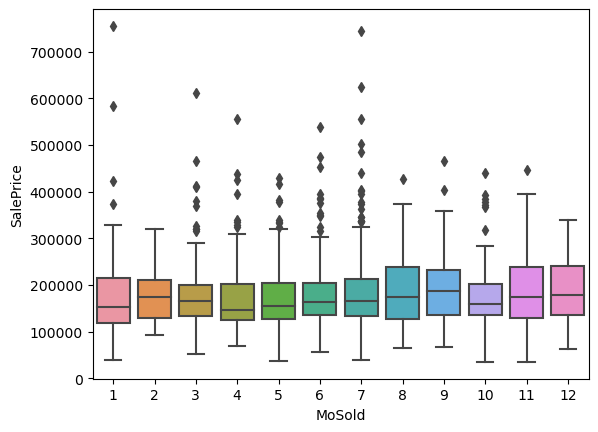

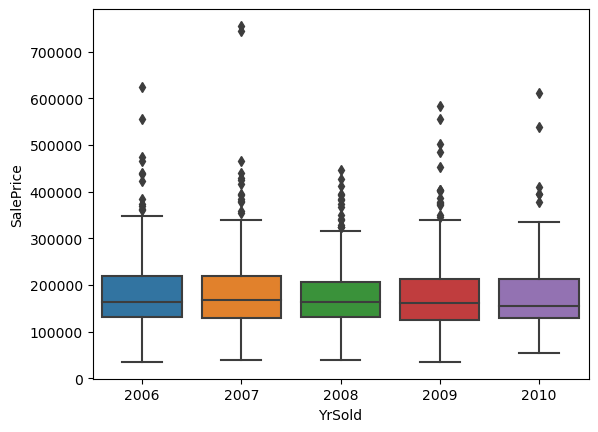

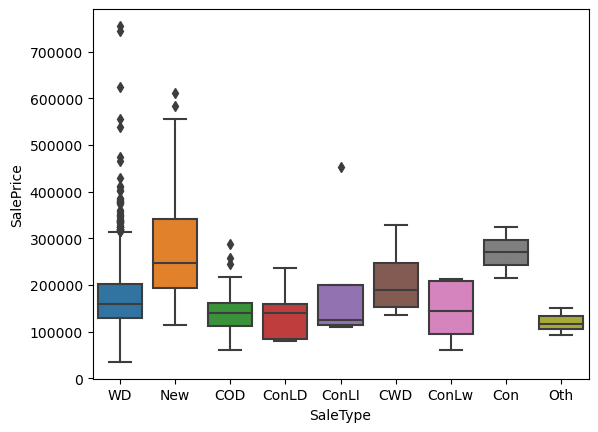

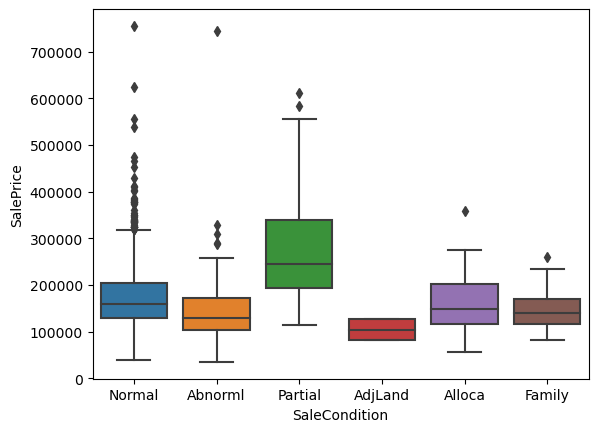

In [94]:
# creating boxplots
for i in df_cat:
    sns.boxplot(x = df_clean[i], y = df_clean['SalePrice'], data = df_clean)
    
    plt.show()


### 3: Data Preparation

In [95]:
df_clean.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal MoSold YrSold SaleType SaleCondition SalePrice  
0        0       0      2   2008       WD        Normal    208500  
1        0       0      5   2007       WD        Normal    181500  
2        0       0      9   2008       WD        Normal    223500  
3        0       0      2   2006       WD       Abnorml    140000  
4        0       0     12   2008       WD        Normal    250000  

[5 rows x 73 columns]

In [96]:
## all the categorical columns

col_categorical = df_clean.select_dtypes(include=['object'])
col_categorical.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... GarageType GarageFinish GarageCars  \
0      CollgCr       Norm       Norm  ...     Attchd          RFn          2   
1      Veenker      Feedr       Norm  ...     Attchd          RFn          2   
2      CollgCr       Norm       Norm  ...     Attchd          RFn          2   
3      Crawfor       Norm       Norm  ...     Detchd          Unf          3   
4      NoRidge       Norm       Norm  ...     Attchd          RFn          3   

  GarageQual GarageCond PavedDrive MoSold YrSold SaleType SaleCondition  
0         TA         TA          Y      2   2008       WD        Normal  
1         TA         TA          Y      5   2007       WD        Normal  
2         TA         TA          Y      9   2008       WD        Normal  
3         TA         TA          Y      2   2006       WD       Abnorml  
4         TA         TA          Y     12   2008       WD        Normal  

[5 rows x 51 columns]

In [97]:
## Get (n-1) dummay variables for all the categorical columns using drop_first = True
cat_dummies = pd.get_dummies(col_categorical, drop_first=True)
cat_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 266 columns]

In [98]:
# Drop categorical variable as we have created the dummies for them
df_clean = df_clean.drop(list(col_categorical.columns), axis=1)

In [ ]:
df_clean.shape

In [99]:
# concat dummy variables with main dataframe
df_clean = pd.concat([df_clean, cat_dummies], axis=1)

In [100]:
df_clean.shape

(1460, 288)

In [101]:
### Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_clean, train_size=0.7, test_size=0.3, random_state=100)

#### Rescaling the Features 

In [102]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 288 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(19), uint8(266)
memory usage: 673.9 KB


In [103]:
df_clean.select_dtypes(include=['int','float']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')

In [105]:
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()    ## MinMaxScaler() can also be used, trying StandardScaler() this time

# Create a list of the variables that you need to scale
## Applying scaler() to all the numerical (int, float) columns except 'dummy' variables

num_vars=['MSSubClass', 'LotFrontage', 'LotArea',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
# Scale these variables using 'fit_transform' for training dataset
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

In [106]:
df_train.head()

MSSubClass  LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
210    -0.657071    -0.123555 -0.473765   -0.560537    0.043512   -0.293313   
318     0.035976     0.918688 -0.056845    0.807462    1.160345   -0.293313   
239    -0.195040    -0.803279 -0.169324   -0.560537   -0.761296   -0.293313   
986    -0.195040    -0.486074 -0.502297   -0.560537   -0.963574   -0.293313   
1416    3.039179    -0.440759  0.082905   -0.560537   -0.963574   -0.293313   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  SaleType_ConLI  \
210   -0.374367    -0.430911 -0.765065 -0.787597  ...               0   
318   -0.454644     0.621579  0.511914  2.140556  ...               0   
239    0.171964    -0.712011 -0.930972  0.795996  ...               0   
986   -0.175904    -1.256778 -0.420683  0.669584  ...               0   
1416   0.475233    -0.620490  0.195183  1.611926  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
210                0             0             0            1   
318                0             0             0            1   
239                0             0             0            1   
986                0             0             0            1   
1416               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
210                       0                     0                     0   
318                       0                     0                     0   
239                       0                     0                     0   
986                       0                     0                     0   
1416                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
210                      1                      0  
318                      1                      0  
239                      1                      0  
986                      1                      0  
1416                     1                      0  

[5 rows x 288 columns]

In [107]:
df_train.describe()

MSSubClass   LotFrontage       LotArea    MasVnrArea    BsmtFinSF1  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -5.118878e-17 -5.140083e-16  1.034590e-16 -1.564751e-16 -4.066831e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -8.880864e-01 -2.208041e+00 -8.742840e-01 -5.605372e-01 -9.635738e-01   
25%   -8.880864e-01 -4.407593e-01 -2.950018e-01 -5.605372e-01 -9.635738e-01   
50%   -1.950396e-01  1.465366e-02 -9.566430e-02 -5.605372e-01 -1.200318e-01   
75%    2.669916e-01  3.749091e-01  9.959718e-02  2.837747e-01  5.685740e-01   
max    3.039179e+00  1.102391e+01  1.987157e+01  7.989457e+00  1.118171e+01   

         BsmtFinSF2     BsmtUnfSF   TotalBsmtSF      1stFlrSF      2ndFlrSF  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean   2.154115e-16  1.229292e-16  4.697516e-17 -2.370506e-16  7.377927e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -2.933126e-01 -1.257417e+00 -2.313626e+00 -2.001824e+00 -7.875971e-01   
25%   -2.933126e-01 -7.757532e-01 -5.856252e-01 -7.374138e-01 -7.875971e-01   
50%   -2.933126e-01 -2.271922e-01 -1.519906e-01 -2.070153e-01 -7.875971e-01   
75%   -2.933126e-01  5.399012e-01  5.496695e-01  6.376005e-01  8.833350e-01   
max    8.338494e+00  3.951683e+00  1.100048e+01  8.857522e+00  3.958586e+00   

       ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count  ...     1021.000000     1021.000000   1021.000000   1021.000000   
mean   ...        0.002938        0.003918      0.078355      0.002938   
std    ...        0.054153        0.062500      0.268860      0.054153   
min    ...        0.000000        0.000000      0.000000      0.000000   
25%    ...        0.000000        0.000000      0.000000      0.000000   
50%    ...        0.000000        0.000000      0.000000      0.000000   
75%    ...        0.000000        0.000000      0.000000      0.000000   
max    ...        1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1021.000000            1021.000000           1021.000000   
mean      0.870715               0.002938              0.007835   
std       0.335680               0.054153              0.088214   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1021.000000           1021.000000            1021.000000  
mean               0.013712              0.825661               0.078355  
std                0.116350              0.379587               0.268860  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 288 columns]

#### Dividing into X and Y sets for the model building

In [108]:
y_train = df_train.pop('SalePrice') # response variable in Y
X_train = df_train  # predictors in variable X

### 4. Model Building and Evaluation

#### Building linear model


In [109]:
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [110]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

87374233291.02223
[-5.01997568e-02  1.33833365e-02  7.74240428e-02  3.61157402e-02
  6.12839320e+10  2.25197240e+10  5.91394746e+10 -6.05196526e+10
 -9.74706752e+10 -1.06603010e+11 -1.18059089e+10  1.30288749e+11
  4.17785645e-02  2.40612030e-02  5.89847565e-03  2.22110748e-02
 -1.16500854e-02  2.15644836e-02  1.15680695e-02  3.57246399e-02
  8.18347931e-03  4.29740429e-01  5.09605885e-01  4.89376068e-01
  4.27387238e-01  1.71127439e-01  1.55973434e-02  7.52186775e-02
  6.51931763e-03  4.50515747e-03 -2.07481384e-02  5.37157059e-02
 -1.43943787e-01  8.50067139e-02 -9.70649719e-02  6.38099909e-02
 -5.99479675e-03  6.92737103e-02 -1.81485772e-01  1.34969294e-01
  7.98559189e-03  4.72514629e-02  2.76842117e-02  2.91900635e-02
  3.22720528e-01 -1.00919247e-01  8.14614296e-02  9.82952118e-03
 -1.91598177e-01 -6.51266575e-02 -4.83117104e-02  1.40722513e-01
 -6.19149208e-03  2.90991068e-01  1.23633385e-01 -3.95336151e-02
  3.16047668e-02  6.20603561e-03  6.57653809e-02  2.02709198e-01
  1.997

#### Applying the scaling on the test sets

In [113]:
df_test[num_vars]

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
1436          20    60.000000     9000         0.0         616           0   
57            60    89.000000    11645         0.0           0           0   
780           20    63.000000     7875        38.0           0           0   
382           60    79.000000     9245         0.0           0           0   
1170          80    76.000000     9880         0.0         522           0   
...          ...          ...      ...         ...         ...         ...   
509           20    80.000000     9600       132.0         991           0   
555           45    58.000000     6380         0.0           0           0   
399           60    65.000000     8125       100.0         812           0   
545           50    70.049958    13837       178.0        1002         202   
266           60    70.000000    11207         0.0         714           0   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  GarageYrBlt  \
1436        248          864       864         0  ...       1974.0   
57          860          860       860       860  ...       2004.0   
780        1237         1237      1253         0  ...       1995.0   
382         939          939       939       858  ...       2006.0   
1170        574         1096      1118         0  ...       1977.0   
...         ...          ...       ...       ...  ...          ...   
509          50         1041      1041         0  ...       1959.0   
555         993          993      1048         0  ...       1922.0   
399         280         1092      1112       438  ...       2007.0   
545           0         1204      1377       806  ...       1988.0   
266          88          802       802       709  ...       1997.0   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
1436         528           0            0              0          0   
57           565           0           70              0          0   
780          402         220           21              0          0   
382          639         144           53              0          0   
1170         358         203            0              0          0   
...          ...         ...          ...            ...        ...   
509          270         224           88              0          0   
555          280           0            0            116          0   
399          438           0          168              0          0   
545          786           0            0              0          0   
266          413          95           75              0          0   

      ScreenPorch  PoolArea  MiscVal  SalePrice  
1436            0         0        0     120500  
57              0         0        0     196500  
780             0         0        0     176000  
382             0         0        0     213500  
1170            0       576        0     171000  
...           ...       ...      ...        ...  
509             0         0        0     124500  
555             0         0        0     113000  
399             0         0        0     241000  
545             0         0        0     229000  
266             0         0        0     185000  

[438 rows x 22 columns]

In [115]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Split the 'df_test' set into X_test and y_test

In [118]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [119]:
from sklearn.metrics import r2_score, mean_squared_error

In [121]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.958584153066007
-1.038592294676397e+19
42.28557971960686
4.684393613107292e+21
0.04141584693399301
1.069496258700295e+19


## Ridge and Lasso Regression

Let's now try predicting sale prices performing ridge and lasso regression.

### Ridge Regression

In [123]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [124]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [125]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-7.97868831e-02 -4.01523305e-02  5.83059835e-02  4.60837158e-02
  1.08750736e-02  2.05978750e-02  8.44001281e-03  2.69245375e-02
  1.10862620e-01  1.50159331e-01 -1.63470041e-02  2.04317718e-01
  2.45635718e-02  5.00752889e-02  2.20825388e-02 -2.34033495e-03
 -5.65281132e-03  2.97114835e-02  2.16950656e-02 -2.33722480e-03
  4.59728719e-03  6.37249212e-02  1.69174336e-02  5.80509860e-02
 -1.36291114e-02  2.25596418e-02  2.22445556e-02 -7.03978767e-02
  1.46080827e-02  8.67255166e-02  3.32501848e-02  1.21010140e-01
 -2.12106301e-02  8.90591583e-02 -5.83557516e-02 -5.22667149e-03
 -2.06619712e-02  6.56986312e-02 -3.31462280e-02 -4.62665483e-03
 -2.17693811e-03 -3.48460163e-04  3.81308801e-02 -4.64145896e-02
  1.73633422e-01 -2.29104551e-01 -1.18298445e-02 -7.99141097e-02
 -4.50691100e-02 -7.87102329e-02 -8.71437329e-02  2.21350656e-02
 -1.19403807e-02  2.08605864e-01  2.22076633e-01 -9.09967668e-02
 -3.15645668e-02 -5.65475305e-02 -1.38455931e-02  1.36642304e-01
  1.05174613e-01 -6.02390

In [126]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8979406717834585
0.8612840855596955
104.20257410908883
62.5654500780755
0.10205932821654146
0.1428434933289395


In [145]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas

Empty DataFrame
Columns: []
Index: [MSSubClass, LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageYrBlt, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, Condition2_RRAn, Condition2_RRNn, BldgType_2fmCon, BldgType_Duplex, BldgType_Twnhs, BldgType_TwnhsE, HouseStyle_1.5Unf, HouseStyle_1Story, HouseStyle_2.5Fin, HouseStyle_2.5Unf, HouseStyle_2Story, HouseStyle_SFoyer, HouseStyle_SLvl, OverallQual_2, OverallQual_3, OverallQual_4, OverallQual_5, OverallQual_6, OverallQual_7, OverallQual_8, OverallQual_9, OverallQual_10, OverallCond_2, OverallCond_3, ...]

In [146]:
betas.shape

(287, 0)

In [148]:
## Now fill in the values of betas, one column for ridge coefficients 
betas['Ridge'] = ridge.coef_


In [149]:
betas

Ridge
MSSubClass            -0.077494
LotFrontage           -0.037941
LotArea                0.056116
MasVnrArea             0.056551
BsmtFinSF1             0.019356
BsmtFinSF2             0.017574
BsmtUnfSF              0.011850
TotalBsmtSF            0.037720
1stFlrSF               0.117135
2ndFlrSF               0.140329
LowQualFinSF          -0.017636
GrLivArea              0.200850
GarageYrBlt            0.032745
GarageArea             0.067551
WoodDeckSF             0.025987
OpenPorchSF           -0.001024
EnclosedPorch         -0.006758
3SsnPorch              0.028304
ScreenPorch            0.024187
PoolArea              -0.006162
MiscVal                0.002635
MSZoning_FV            0.052934
MSZoning_RH            0.004565
MSZoning_RL            0.045361
MSZoning_RM           -0.031799
Street_Pave            0.014659
LotShape_IR2           0.017938
LotShape_IR3          -0.053168
LotShape_Reg           0.004892
LandContour_HLS        0.060727
LandContour_Low        0.018613
LandContour_Lvl        0.085108
Utilities_NoSeWa      -0.011750
LotConfig_CulDSac      0.073645
LotConfig_FR2         -0.035248
LotConfig_FR3         -0.001913
LotConfig_Inside      -0.017642
LandSlope_Mod          0.044765
LandSlope_Sev         -0.020399
Neighborhood_Blueste  -0.001569
Neighborhood_BrDale   -0.001598
Neighborhood_BrkSide   0.010178
Neighborhood_ClearCr   0.026114
Neighborhood_CollgCr  -0.049864
Neighborhood_Crawfor   0.129784
Neighborhood_Edwards  -0.185312
Neighborhood_Gilbert  -0.013902
Neighborhood_IDOTRR   -0.049867
Neighborhood_MeadowV  -0.029805
Neighborhood_Mitchel  -0.055287
Neighborhood_NAmes    -0.071540
Neighborhood_NPkVill   0.014079
Neighborhood_NWAmes   -0.005299
Neighborhood_NoRidge   0.145086
Neighborhood_NridgHt   0.179888
Neighborhood_OldTown  -0.064927
Neighborhood_SWISU    -0.019091
Neighborhood_Sawyer   -0.044062
Neighborhood_SawyerW  -0.018291
Neighborhood_Somerst   0.094795
Neighborhood_StoneBr   0.063082
Neighborhood_Timber   -0.036290
Neighborhood_Veenker   0.040954
Condition1_Feedr      -0.069358
Condition1_Norm        0.113537
Condition1_PosA        0.027628
Condition1_PosN       -0.053177
Condition1_RRAe       -0.027041
Condition1_RRAn        0.036208
Condition1_RRNe       -0.004629
Condition1_RRNn        0.009262
Condition2_Feedr       0.009538
Condition2_Norm        0.057472
Condition2_PosA        0.018379
Condition2_PosN       -0.088644
Condition2_RRAe       -0.000556
Condition2_RRAn       -0.000351
Condition2_RRNn        0.007236
BldgType_2fmCon        0.009988
BldgType_Duplex       -0.014224
BldgType_Twnhs        -0.028464
BldgType_TwnhsE        0.001686
HouseStyle_1.5Unf      0.026870
HouseStyle_1Story      0.040333
HouseStyle_2.5Fin     -0.020715
HouseStyle_2.5Unf      0.005470
HouseStyle_2Story     -0.028064
HouseStyle_SFoyer      0.003406
HouseStyle_SLvl        0.011620
OverallQual_2         -0.014118
OverallQual_3         -0.045913
OverallQual_4         -0.113006
OverallQual_5         -0.108508
OverallQual_6         -0.103535
OverallQual_7         -0.038337
OverallQual_8          0.095982
OverallQual_9          0.216777
OverallQual_10         0.130825
OverallCond_2          0.002845
OverallCond_3         -0.060927
OverallCond_4         -0.060443
OverallCond_5         -0.045327
OverallCond_6          0.012643
OverallCond_7          0.073153
OverallCond_8          0.051544
OverallCond_9          0.046679
RoofStyle_Gable       -0.023034
RoofStyle_Gambrel      0.000437
RoofStyle_Hip          0.006007
RoofStyle_Mansard      0.012587
RoofStyle_Shed         0.006215
RoofMatl_CompShg       0.021536
RoofMatl_Membran       0.008294
RoofMatl_Metal         0.004973
RoofMatl_Roll         -0.000317
RoofMatl_Tar&Grv      -0.023894
RoofMatl_WdShake       0.002849
RoofMatl_WdShngl       0.090735
Exterior1st_AsphShn   -0.001757
Exterior1st_BrkComm   -0.010296
Exterior1st_BrkFace    0.091309
Exterior1st_CBlock    -0.007815
Exterior1st_CemntBd   -0.011080
Exterior1st_HdBoard   -0.004124
Exterior1st_ImStucc   -0.0

In [150]:
## View the top 5 coefficients of Ridge in descending order
betas['Ridge'].sort_values(ascending=False)[:5]

OverallQual_9           0.216777
GrLivArea               0.200850
Fireplaces_2            0.190282
Neighborhood_NridgHt    0.179888
GarageCars_3            0.176775
Name: Ridge, dtype: float64

### Lasso

In [127]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [128]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [172]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [173]:
lasso.coef_

array([-8.19041894e-02, -3.30605841e-02,  5.92711428e-02,  2.41081086e-02,
        4.51818809e-03,  1.24778260e-02, -0.00000000e+00,  1.37826761e-02,
        0.00000000e+00,  0.00000000e+00, -3.18906943e-02,  3.72001038e-01,
        1.64697596e-02,  2.10316331e-02,  1.25471598e-02,  1.62013068e-03,
       -1.51109536e-03,  2.82080074e-02,  1.96976618e-02, -6.53129126e-03,
        3.79763102e-03,  0.00000000e+00,  0.00000000e+00,  6.27170151e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -7.05359522e-02,
        5.45736129e-03,  2.55620990e-02,  4.53152633e-03,  1.14871672e-01,
       -0.00000000e+00,  9.20329405e-02, -5.25286822e-02, -0.00000000e+00,
       -2.13278193e-03,  5.35424188e-02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.15142723e-01,  0.00000000e+00,
        2.81119538e-01, -2.15277471e-01,  1.36073186e-02, -9.82995606e-02,
       -4.96903310e-02, -4.87260143e-02, -6.35965914e-02,  0.00000000e+00,
        0.00000000e+00,  

In [174]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9221751386387779
0.8504500551468319
79.45918344980775
67.45195492991837
0.07782486136122209
0.15399989710027026


In [175]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas_lasso = pd.DataFrame(index=X_train.columns)
betas_lasso.rows = X_train.columns
# betas_lasso

In [176]:
betas_lasso.shape

(287, 0)

In [177]:


## Now fill in the values of betas, one column for ridge coefficients 
betas_lasso['Lasso'] = lasso.coef_


## View the top 5 coefficients of Ridge in descending order
betas_lasso['Lasso'].sort_values(ascending=False)[:10]

OverallQual_10          0.917842
OverallQual_9           0.772296
RoofMatl_WdShngl        0.685467
FullBath_3              0.553067
GrLivArea               0.372001
Neighborhood_NoRidge    0.344767
OverallQual_8           0.331663
Neighborhood_Crawfor    0.281120
Neighborhood_NridgHt    0.242725
BsmtExposure_Gd         0.233286
Name: Lasso, dtype: float64

 Creating a table which contain all the metrics for Ridge and lasso model

In [132]:


lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.585842e-01          0.897941          0.922175
1   R2 Score (Test)      -1.038592e+19          0.861284          0.850450
2       RSS (Train)       4.228558e+01        104.202574         79.459183
3        RSS (Test)       4.684394e+21         62.565450         67.451955
4       MSE (Train)       2.035088e-01          0.319467          0.278971
5        MSE (Test)       3.270315e+09          0.377946          0.392428

In [133]:
## changes in the coefficients after regularization

In [135]:
betas = pd.DataFrame(index=X_train.columns)

In [137]:
betas.rows = X_train.columns

In [138]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [139]:
pd.set_option('display.max_rows', None)
betas

Linear     Ridge     Lasso
MSSubClass            -5.019976e-02 -0.079787 -0.081904
LotFrontage            1.338334e-02 -0.040152 -0.033061
LotArea                7.742404e-02  0.058306  0.059271
MasVnrArea             3.611574e-02  0.046084  0.024108
BsmtFinSF1             6.128393e+10  0.010875  0.004518
BsmtFinSF2             2.251972e+10  0.020598  0.012478
BsmtUnfSF              5.913947e+10  0.008440 -0.000000
TotalBsmtSF           -6.051965e+10  0.026925  0.013783
1stFlrSF              -9.747068e+10  0.110863  0.000000
2ndFlrSF              -1.066030e+11  0.150159  0.000000
LowQualFinSF          -1.180591e+10 -0.016347 -0.031891
GrLivArea              1.302887e+11  0.204318  0.372001
GarageYrBlt            4.177856e-02  0.024564  0.016470
GarageArea             2.406120e-02  0.050075  0.021032
WoodDeckSF             5.898476e-03  0.022083  0.012547
OpenPorchSF            2.221107e-02 -0.002340  0.001620
EnclosedPorch         -1.165009e-02 -0.005653 -0.001511
3SsnPorch              2.156448e-02  0.029711  0.028208
ScreenPorch            1.156807e-02  0.021695  0.019698
PoolArea               3.572464e-02 -0.002337 -0.006531
MiscVal                8.183479e-03  0.004597  0.003798
MSZoning_FV            4.297404e-01  0.063725  0.000000
MSZoning_RH            5.096059e-01  0.016917  0.000000
MSZoning_RL            4.893761e-01  0.058051  0.062717
MSZoning_RM            4.273872e-01 -0.013629 -0.000000
Street_Pave            1.711274e-01  0.022560  0.000000
LotShape_IR2           1.559734e-02  0.022245  0.000000
LotShape_IR3           7.521868e-02 -0.070398 -0.070536
LotShape_Reg           6.519318e-03  0.014608  0.005457
LandContour_HLS        4.505157e-03  0.086726  0.025562
LandContour_Low       -2.074814e-02  0.033250  0.004532
LandContour_Lvl        5.371571e-02  0.121010  0.114872
Utilities_NoSeWa      -1.439438e-01 -0.021211 -0.000000
LotConfig_CulDSac      8.500671e-02  0.089059  0.092033
LotConfig_FR2         -9.706497e-02 -0.058356 -0.052529
LotConfig_FR3          6.380999e-02 -0.005227 -0.000000
LotConfig_Inside      -5.994797e-03 -0.020662 -0.002133
LandSlope_Mod          6.927371e-02  0.065699  0.053542
LandSlope_Sev         -1.814858e-01 -0.033146 -0.000000
Neighborhood_Blueste   1.349693e-01 -0.004627 -0.000000
Neighborhood_BrDale    7.985592e-03 -0.002177  0.000000
Neighborhood_BrkSide   4.725146e-02 -0.000348  0.000000
Neighborhood_ClearCr   2.768421e-02  0.038131  0.115143
Neighborhood_CollgCr   2.919006e-02 -0.046415  0.000000
Neighborhood_Crawfor   3.227205e-01  0.173633  0.281120
Neighborhood_Edwards  -1.009192e-01 -0.229105 -0.215277
Neighborhood_Gilbert   8.146143e-02 -0.011830  0.013607
Neighborhood_IDOTRR    9.829521e-03 -0.079914 -0.098300
Neighborhood_MeadowV  -1.915982e-01 -0.045069 -0.049690
Neighborhood_Mitchel  -6.512666e-02 -0.078710 -0.048726
Neighborhood_NAmes    -4.831171e-02 -0.087144 -0.063597
Neighborhood_NPkVill   1.407225e-01  0.022135  0.000000
Neighborhood_NWAmes   -6.191492e-03 -0.011940  0.000000
Neighborhood_NoRidge   2.909911e-01  0.208606  0.344767
Neighborhood_NridgHt   1.236334e-01  0.222077  0.242725
Neighborhood_OldTown  -3.953362e-02 -0.090997 -0.104995
Neighborhood_SWISU     3.160477e-02 -0.031565 -0.000000
Neighborhood_Sawyer    6.206036e-03 -0.056548 -0.031336
Neighborhood_SawyerW   6.576538e-02 -0.013846  0.004678
Neighborhood_Somerst   2.027092e-01  0.136642  0.232571
Neighborhood_StoneBr   1.997530e-01  0.105175  0.118866
Neighborhood_Timber   -3.917658e-02 -0.060239 -0.024038
Neighborhood_Veenker   1.713954e-01  0.056911  0.016560
Condition1_Feedr       1.870275e-02 -0.073505 -0.063333
Condition1_Norm        1.798482e-01  0.121654  0.116394
Condition1_PosA        2.292860e-01  0.049696  0.059987
Condition1_PosN        1.483303e-01 -0.070563  0.000000
Condition1_RRAe       -7.295120e-02 -0.044622 -0.031537
Condition1_RRAn        1.250105e-01  0.061797  0.061381
Condition1_RRNe        8.675933e-03 -0.007109 -0.000000
Condition1_RRNn        8.163822e-02  0.017887  0.0000

### for subjective questions - Assignment Part-II

### Question 1



What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Answer 1

Note:

for Ridge, optimal value of alpha is 20.
For lasso, optimal value of alpha is 0.001


##### Building Ridge model with alpha =40

In [155]:
#Fitting Ridge model for alpha = 40 (double the optimal value)
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-7.74935536e-02 -3.79410659e-02  5.61157116e-02  5.65509473e-02
  1.93558710e-02  1.75740309e-02  1.18500490e-02  3.77195139e-02
  1.17134591e-01  1.40328831e-01 -1.76356755e-02  2.00849716e-01
  3.27453219e-02  6.75510630e-02  2.59867307e-02 -1.02350139e-03
 -6.75760747e-03  2.83043600e-02  2.41867895e-02 -6.16204512e-03
  2.63461882e-03  5.29341343e-02  4.56548059e-03  4.53605254e-02
 -3.17986291e-02  1.46592746e-02  1.79383981e-02 -5.31679870e-02
  4.89154989e-03  6.07269356e-02  1.86125495e-02  8.51078302e-02
 -1.17496565e-02  7.36450474e-02 -3.52483196e-02 -1.91315247e-03
 -1.76417144e-02  4.47646746e-02 -2.03994008e-02 -1.56897698e-03
 -1.59804194e-03  1.01781015e-02  2.61139289e-02 -4.98639730e-02
  1.29783653e-01 -1.85312005e-01 -1.39022582e-02 -4.98674164e-02
 -2.98054732e-02 -5.52865937e-02 -7.15404681e-02  1.40793665e-02
 -5.29860046e-03  1.45085636e-01  1.79887553e-01 -6.49273845e-02
 -1.90911917e-02 -4.40619630e-02 -1.82908345e-02  9.47949202e-02
  6.30820864e-02 -3.62902

In [156]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8829950993887237
0.8565029508323883
119.46200352411307
64.72189944659135
0.11700490061127627
0.14776689371367888


##### Building lasso with alpha =0.002

In [158]:
## Now we will build the lasso model with double value of alpha i.e. 0.002
lasso = Lasso(alpha=0.002)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [159]:
lasso.coef_



array([-8.21847432e-02, -3.79521850e-02,  5.69729650e-02,  2.53593519e-02,
        0.00000000e+00,  6.38432640e-05,  0.00000000e+00,  2.47921963e-02,
        2.64144414e-03,  0.00000000e+00, -2.97033975e-02,  3.47364019e-01,
        2.62775507e-02,  3.56765502e-02,  1.58098106e-02,  0.00000000e+00,
       -2.69868834e-03,  2.83937470e-02,  1.96094744e-02, -7.99159881e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.97201438e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  9.74158418e-02,
       -0.00000000e+00,  7.92372261e-02, -3.99393917e-03, -0.00000000e+00,
       -0.00000000e+00,  3.91220132e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  1.85983587e-02, -0.00000000e+00,
        2.58518995e-01, -2.13265933e-01,  0.00000000e+00, -4.52855935e-02,
       -0.00000000e+00, -2.65897229e-03, -5.92142574e-02,  0.00000000e+00,
        0.00000000e+00,  

In [160]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9078182146319744
0.8579261943366392
94.11760286075406
64.0799697100255
0.09218178536802553
0.14630130070782077


In [164]:

# Again creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],
             'Ridge Regression' : metric2,
            'Lasso Regression' : metric3
        
        }

rg_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'] )

# --rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([ rg_metric, ls_metric], axis = 1)

final_metric

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.882995          0.907818
1   R2 Score (Test)          0.856503          0.857926
2       RSS (Train)        119.462004         94.117603
3        RSS (Test)         64.721899         64.079970
4       MSE (Train)          0.342060          0.303615
5        MSE (Test)          0.384405          0.382494

 - Changes in Ridge Regression metrics:
 
R2 score of train set decreased from 0.897 to 0.882

R2 score of test set changed  from 0.861 to 0.856

- Changes in Lasso metrics:

R2 score of train set changed to 0.907 from 0.922

R2 score of test set changed to 0.857 from 0.850

In [167]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas

## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [168]:
betas

Ridge     Lasso
MSSubClass            -0.077494 -0.082185
LotFrontage           -0.037941 -0.037952
LotArea                0.056116  0.056973
MasVnrArea             0.056551  0.025359
BsmtFinSF1             0.019356  0.000000
BsmtFinSF2             0.017574  0.000064
BsmtUnfSF              0.011850  0.000000
TotalBsmtSF            0.037720  0.024792
1stFlrSF               0.117135  0.002641
2ndFlrSF               0.140329  0.000000
LowQualFinSF          -0.017636 -0.029703
GrLivArea              0.200850  0.347364
GarageYrBlt            0.032745  0.026278
GarageArea             0.067551  0.035677
WoodDeckSF             0.025987  0.015810
OpenPorchSF           -0.001024  0.000000
EnclosedPorch         -0.006758 -0.002699
3SsnPorch              0.028304  0.028394
ScreenPorch            0.024187  0.019609
PoolArea              -0.006162 -0.007992
MiscVal                0.002635  0.000000
MSZoning_FV            0.052934  0.000000
MSZoning_RH            0.004565  0.000000
MSZoning_RL            0.045361  0.069720
MSZoning_RM           -0.031799 -0.000000
Street_Pave            0.014659  0.000000
LotShape_IR2           0.017938  0.000000
LotShape_IR3          -0.053168 -0.000000
LotShape_Reg           0.004892  0.000000
LandContour_HLS        0.060727  0.000000
LandContour_Low        0.018613  0.000000
LandContour_Lvl        0.085108  0.097416
Utilities_NoSeWa      -0.011750 -0.000000
LotConfig_CulDSac      0.073645  0.079237
LotConfig_FR2         -0.035248 -0.003994
LotConfig_FR3         -0.001913 -0.000000
LotConfig_Inside      -0.017642 -0.000000
LandSlope_Mod          0.044765  0.039122
LandSlope_Sev         -0.020399 -0.000000
Neighborhood_Blueste  -0.001569 -0.000000
Neighborhood_BrDale   -0.001598 -0.000000
Neighborhood_BrkSide   0.010178  0.000000
Neighborhood_ClearCr   0.026114  0.018598
Neighborhood_CollgCr  -0.049864 -0.000000
Neighborhood_Crawfor   0.129784  0.258519
Neighborhood_Edwards  -0.185312 -0.213266
Neighborhood_Gilbert  -0.013902  0.000000
Neighborhood_IDOTRR   -0.049867 -0.045286
Neighborhood_MeadowV  -0.029805 -0.000000
Neighborhood_Mitchel  -0.055287 -0.002659
Neighborhood_NAmes    -0.071540 -0.059214
Neighborhood_NPkVill   0.014079  0.000000
Neighborhood_NWAmes   -0.005299  0.000000
Neighborhood_NoRidge   0.145086  0.338145
Neighborhood_NridgHt   0.179888  0.236482
Neighborhood_OldTown  -0.064927 -0.071725
Neighborhood_SWISU    -0.019091 -0.000000
Neighborhood_Sawyer   -0.044062 -0.011850
Neighborhood_SawyerW  -0.018291  0.000000
Neighborhood_Somerst   0.094795  0.222501
Neighborhood_StoneBr   0.063082  0.059670
Neighborhood_Timber   -0.036290 -0.000000
Neighborhood_Veenker   0.040954  0.000000
Condition1_Feedr      -0.069358 -0.057700
Condition1_Norm        0.113537  0.122357
Condition1_PosA        0.027628  0.000000
Condition1_PosN       -0.053177 -0.000000
Condition1_RRAe       -0.027041 -0.000000
Condition1_RRAn        0.036208  0.007323
Condition1_RRNe       -0.004629 -0.000000
Condition1_RRNn        0.009262  0.000000
Condition2_Feedr       0.009538  0.000000
Condition2_Norm        0.057472  0.000000
Condition2_PosA        0.018379  0.000000
Condition2_PosN       -0.088644 -1.949304
Condition2_RRAe       -0.000556 -0.000000
Condition2_RRAn       -0.000351  0.000000
Condition2_RRNn        0.007236  0.000000
BldgType_2fmCon        0.009988  0.000000
BldgType_Duplex       -0.014224 -0.000000
BldgType_Twnhs        -0.028464 -0.000000
BldgType_TwnhsE        0.001686  0.000000
HouseStyle_1.5Unf      0.026870  0.000000
HouseStyle_1Story      0.040333  0.036041
HouseStyle_2.5Fin     -0.020715 -0.000000
HouseStyle_2.5Unf      0.005470 -0.000000
HouseStyle_2Story     -0.028064 -0.014524
HouseStyle_SFoyer      0.003406 -0.000000
HouseStyle_SLvl        0.011620  0.000000
OverallQual_2         -0.014118 -0.000000
OverallQual_3         -0.045913 -0.000000
OverallQual_4         -0.113006 -0.054380
OverallQual_5         -0.108508 -0.029561
OverallQual_6         -0.103535 -0.000000
OverallQual_7         -0.038337  0.0

In [169]:
betas.shape

(287, 2)

In [170]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9           0.216777
GrLivArea               0.200850
Fireplaces_2            0.190282
Neighborhood_NridgHt    0.179888
GarageCars_3            0.176775
TotRmsAbvGrd_10         0.173527
FullBath_3              0.169123
BsmtExposure_Gd         0.159164
Neighborhood_NoRidge    0.145086
2ndFlrSF                0.140329
Name: Ridge, dtype: float64

In [171]:
## View the top 10 coefficients of Lasso regression in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_10          0.745474
OverallQual_9           0.723331
FullBath_3              0.506430
GrLivArea               0.347364
Neighborhood_NoRidge    0.338145
RoofMatl_WdShngl        0.314195
OverallQual_8           0.305218
Neighborhood_Crawfor    0.258519
Neighborhood_NridgHt    0.236482
GarageCars_3            0.233474
Name: Lasso, dtype: float64

### Question 3


After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


### Answer 1

The top 5 most important variables for lasso (alpha = 0.001) are:
- OverallQual_10          0.917842
- OverallQual_9           0.772296
- RoofMatl_WdShngl        0.685467
- FullBath_3              0.553067
- GrLivArea               0.372001

In [179]:
## Create a list of top 5 lasso predictors that are to be removed
top5 = ['OverallQual_10', 'GrLivArea', 'OverallQual_9', 'RoofMatl_WdShngl', 'FullBath_3']

In [180]:
## drop them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [181]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_dropped, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [182]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [183]:
#  we get optimum value of alpha as 0.001.

In [184]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_dropped, y_train) 



lasso.coef_

array([-8.32600679e-02, -3.52321145e-02,  6.41781738e-02,  3.40261312e-02,
        3.08704844e-03,  1.08065969e-02, -0.00000000e+00,  2.51096930e-02,
        2.96807689e-01,  3.56895383e-01,  0.00000000e+00,  2.45981974e-02,
        1.27762729e-02,  2.13216535e-02,  2.76682125e-03, -3.32863609e-03,
        2.53338436e-02,  1.87557516e-02, -3.03199899e-03,  6.58918318e-03,
        0.00000000e+00,  0.00000000e+00,  6.23337678e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.01612907e-01,  5.65800516e-03,
        7.08961295e-02,  0.00000000e+00,  1.26734185e-01, -0.00000000e+00,
        8.26836060e-02, -5.87977290e-02, -0.00000000e+00, -3.19558001e-03,
        5.34731419e-02, -5.16647964e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  6.32731018e-02,  0.00000000e+00,  2.48975453e-01,
       -2.22075343e-01,  1.53368743e-02, -1.09129936e-01, -2.11488632e-02,
       -6.84198899e-02, -7.94244555e-02,  0.00000000e+00,  0.00000000e+00,
        3.71424329e-01,  

In [185]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_dropped)
y_pred_test = lasso.predict(X_test_dropped)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9138762667985988
0.8466367038105702
87.93233159863067
69.17190208682311
0.08612373320140124
0.15792671709320344


In [186]:
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas

Empty DataFrame
Columns: []
Index: [MSSubClass, LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GarageYrBlt, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, Condition2_RRAn, Condition2_RRNn, BldgType_2fmCon, BldgType_Duplex, BldgType_Twnhs, BldgType_TwnhsE, HouseStyle_1.5Unf, HouseStyle_1Story, HouseStyle_2.5Fin, HouseStyle_2.5Unf, HouseStyle_2Story, HouseStyle_SFoyer, HouseStyle_SLvl, OverallQual_2, OverallQual_3, OverallQual_4, OverallQual_5, OverallQual_6, OverallQual_7, OverallQual_8, OverallCond_2, OverallCond_3, OverallCond_4, OverallCond_5, OverallCond_6, ...]

In [187]:
betas['Lasso'] = lasso.coef_

In [188]:
betas


Lasso
MSSubClass            -0.083260
LotFrontage           -0.035232
LotArea                0.064178
MasVnrArea             0.034026
BsmtFinSF1             0.003087
BsmtFinSF2             0.010807
BsmtUnfSF             -0.000000
TotalBsmtSF            0.025110
1stFlrSF               0.296808
2ndFlrSF               0.356895
LowQualFinSF           0.000000
GarageYrBlt            0.024598
GarageArea             0.012776
WoodDeckSF             0.021322
OpenPorchSF            0.002767
EnclosedPorch         -0.003329
3SsnPorch              0.025334
ScreenPorch            0.018756
PoolArea              -0.003032
MiscVal                0.006589
MSZoning_FV            0.000000
MSZoning_RH            0.000000
MSZoning_RL            0.062334
MSZoning_RM           -0.000000
Street_Pave            0.000000
LotShape_IR2           0.000000
LotShape_IR3          -0.101613
LotShape_Reg           0.005658
LandContour_HLS        0.070896
LandContour_Low        0.000000
LandContour_Lvl        0.126734
Utilities_NoSeWa      -0.000000
LotConfig_CulDSac      0.082684
LotConfig_FR2         -0.058798
LotConfig_FR3         -0.000000
LotConfig_Inside      -0.003196
LandSlope_Mod          0.053473
LandSlope_Sev         -0.051665
Neighborhood_Blueste  -0.000000
Neighborhood_BrDale    0.000000
Neighborhood_BrkSide  -0.000000
Neighborhood_ClearCr   0.063273
Neighborhood_CollgCr   0.000000
Neighborhood_Crawfor   0.248975
Neighborhood_Edwards  -0.222075
Neighborhood_Gilbert   0.015337
Neighborhood_IDOTRR   -0.109130
Neighborhood_MeadowV  -0.021149
Neighborhood_Mitchel  -0.068420
Neighborhood_NAmes    -0.079424
Neighborhood_NPkVill   0.000000
Neighborhood_NWAmes    0.000000
Neighborhood_NoRidge   0.371424
Neighborhood_NridgHt   0.296788
Neighborhood_OldTown  -0.110145
Neighborhood_SWISU    -0.000000
Neighborhood_Sawyer   -0.045510
Neighborhood_SawyerW   0.002129
Neighborhood_Somerst   0.276119
Neighborhood_StoneBr   0.230020
Neighborhood_Timber   -0.065594
Neighborhood_Veenker   0.056229
Condition1_Feedr      -0.073761
Condition1_Norm        0.112417
Condition1_PosA        0.012855
Condition1_PosN        0.000000
Condition1_RRAe       -0.035622
Condition1_RRAn        0.052002
Condition1_RRNe       -0.000000
Condition1_RRNn        0.000000
Condition2_Feedr       0.000000
Condition2_Norm        0.000000
Condition2_PosA        0.000000
Condition2_PosN       -2.980347
Condition2_RRAe        0.000000
Condition2_RRAn       -0.000000
Condition2_RRNn        0.000000
BldgType_2fmCon        0.011886
BldgType_Duplex       -0.000000
BldgType_Twnhs        -0.020131
BldgType_TwnhsE       -0.000000
HouseStyle_1.5Unf      0.042640
HouseStyle_1Story      0.052009
HouseStyle_2.5Fin     -0.000000
HouseStyle_2.5Unf     -0.000000
HouseStyle_2Story     -0.057363
HouseStyle_SFoyer      0.000000
HouseStyle_SLvl        0.012289
OverallQual_2         -0.028484
OverallQual_3         -0.277942
OverallQual_4         -0.354165
OverallQual_5         -0.321041
OverallQual_6         -0.305972
OverallQual_7         -0.225256
OverallQual_8         -0.075763
OverallCond_2          0.000000
OverallCond_3         -0.159972
OverallCond_4         -0.085412
OverallCond_5         -0.070119
OverallCond_6          0.000000
OverallCond_7          0.055910
OverallCond_8          0.058438
OverallCond_9          0.053371
RoofStyle_Gable       -0.000692
RoofStyle_Gambrel      0.000000
RoofStyle_Hip         -0.000000
RoofStyle_Mansard      0.036705
RoofStyle_Shed         0.000000
RoofMatl_CompShg       0.027131
RoofMatl_Membran       0.000000
RoofMatl_Metal         0.000000
RoofMatl_Roll         -0.000000
RoofMatl_Tar&Grv      -0.000000
RoofMatl_WdShake       0.000000
Exterior1st_AsphShn   -0.000000
Exterior1st_BrkComm   -0.000000
Exterior1st_BrkFace    0.158398
Exterior1st_CBlock    -0.000000
Exterior1st_CemntBd   -0.000000
Exterior1st_HdBoard   -0.000000
Exterior1st_ImStucc   -0.000000
Exterior1st_MetalSd    0.000000
Exterior1st_Plywood    0.000000
Exterior1st_Stone     -0.000000
Exterior1st_Stucco    -0.0

In [190]:
## View the top 10 coefficients of Lasso regression in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

Neighborhood_NoRidge    0.371424
2ndFlrSF                0.356895
1stFlrSF                0.296808
Neighborhood_NridgHt    0.296788
GarageCars_3            0.277917
Name: Lasso, dtype: float64